# GREAT ENERGY PREDICTOR - ML REGRESSION
![](https://i.imgur.com/3YnTGo5.png)

# Introduction to Competition
The data used in this project comes from a [kaggle comptition](https://www.kaggle.com/competitions/ashrae-energy-prediction) that attempts to predict hourly electricity meter readings for different buildings situated at different sites using different electricity meters.<br>
Data for 2016 has been provided as Training Dataset and Test Dataset comprises of data from 2017 and 2018 for 1000+ buldings.<br> **Now the organisation wants to make some improvements to the buildings so that buildings become energy efficient.**
<br>
> <img src="https://i.imgur.com/6R0px08.png" width="600">

## Objective:
The **GOAL** of this competition is to create best models that can accurately **predict meter readings for coming years if there were no improvements/changes made.** So that best comparisons can be made with actual meter readings obtained after applying the improvements. That is why the test set is doublt the size of train set.
<br>
**This would help organisation** to show case their products and their performances to **attract  large scale investors and financial institutions to invest in this area** to enable progress in building efficiencies.

## All Data
This data consists of various buildingmore than 1000 buildings having different types of meters installed. There are 3 files containing building features,types of meters, timestamps and meter readings and weather parameters for the site respectively.

The dataset includes three years of hourly meter readings from over one thousand buildings at several different sites around the world.<br>
**ALL FILES:-**
> **train.csv**
> (21 million rows of data)
- **building_id** - Foreign key for the building metadata.
- **meter** - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, 3: hotwater}. Not every building has all meter types.
- **timestamp** - When the measurement was taken
- **meter_reading** - The target variable. Energy consumption in kWh (or equivalent). This is real data with measurement error, which can impose a baseline level of modeling error.
> **building_meta.csv**
- **site_id** - Foreign key for the weather files.
- **building_id** - Foreign key for training.csv
- **primary_use** - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
- **square_feet** - Gross floor area of the building
- **year_built** - Year building was opened
- **floor_count** - Number of floors of the building
> **weather_[train/test].csv**
Weather data from a meteorological station as close as possible to the site.

- **site_id**
- air_temperature - Degrees Celsius
- cloud_coverage - Portion of the sky covered in clouds, in oktas
- dew_temperature - Degrees Celsius
- precip_depth_1_hr - Millimeters
- sea_level_pressure - Millibar/hectopascals
- wind_direction - Compass direction (0-360)
- wind_speed - Meters per second
> **test.csv**(42 Million rows of data)
<br>
- **row_id** - Row id for your submission file
- **building_id** - Building id code
- **meter** - The meter id code
- **timestamp** - Timestamps for the test data period
<br>
The submission files use row numbers for ID codes in order to save space on the file uploads. test.csv has no feature data.

## Evaluation

Submissions are to done in CSV format. For each row id in the test set, Meter readings need to be predicted. The Loss function recommended by the competition host is Logarithmic Mean Squared Error (RMLSE) 

Evaluation is also done by finding RMLSE between the predicted values and the observed values. Here is the screenshot of Evaluation metric:
![](https://i.imgur.com/5BMCOGW.png)
<br>
**More information about RMLSE:**
- RMSLE metric considers the relative error between and the Predicted and the actual value and the scale of the error is not significant. On the other hand, RMSE value Increases in magnitude if the scale of error increases.
- RMSLE incurs a larger penalty for the underestimation of the Actual variable than the Overestimation.

Here is a [blog post](https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a) that compares RMLSE with RMSE very nicely and explains in depth about RMLSE


## Attributes of this Project
Competition makes it a very challenging and interesting Machine Learning Regression Project as it:
1. Contains huge amont of data (More than 60 Million Rows).Handling which is itself a challenging task
2. Requires lots of EDA 
3. Involves processing time series data
4. Lots of Missing Data
5. Requires feature engineering
6. As it is a featured competition, It has quite complicated data, so handling this requires lots of analytical and rational sense. 
7. All Regression Models can be tested and applied for better results.
<br>
The techniques necessary to work with this data are applicable to many other types of Machine Learning problems. 

# Importing Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import missingno as msg
from xgboost import XGBRegressor
import lightgbm as lgb
import gc
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis
<br>
It is always a good practise to explore all the data that you want to use to find predictions using ML models. So that you can select best models to train your data. Also you can clean the data by finding and removing erratic data and outliers and impute missing values with best strategy. Finding relations between columns can also help you alot figuring out different paramets you need to provide to your models.

## Getting a Highlevel information about data

In [3]:
# checking what files we have and their sizes
data_dir="/kaggle/input/ashrae-energy-prediction"
! ls -lh {data_dir}

total 2.5G
-rw-r--r-- 1 nobody nogroup  45K Dec 28 21:55 building_metadata.csv
-rw-r--r-- 1 nobody nogroup 427M Dec 28 21:55 sample_submission.csv
-rw-r--r-- 1 nobody nogroup 1.4G Dec 28 21:56 test.csv
-rw-r--r-- 1 nobody nogroup 648M Dec 28 21:55 train.csv
-rw-r--r-- 1 nobody nogroup  15M Dec 28 21:55 weather_test.csv
-rw-r--r-- 1 nobody nogroup 7.2M Dec 28 21:55 weather_train.csv


In [7]:
# checking number of rows there in train csv
!wc -l {data_dir}/train.csv

20216101 /kaggle/input/ashrae-energy-prediction/train.csv


In [15]:
!wc -l {data_dir}/test.csv

41697601 /kaggle/input/ashrae-energy-prediction/test.csv


In [11]:
# viewing top 10 rows just to have an idea so that we can load the data with suitable dtypes for faster loading
!head {data_dir}/train.csv

building_id,meter,timestamp,meter_reading

0,0,2016-01-01 00:00:00,0.0

1,0,2016-01-01 00:00:00,0.0

2,0,2016-01-01 00:00:00,0.0

3,0,2016-01-01 00:00:00,0.0

4,0,2016-01-01 00:00:00,0.0

5,0,2016-01-01 00:00:00,0.0

6,0,2016-01-01 00:00:00,0.0

7,0,2016-01-01 00:00:00,0.0

8,0,2016-01-01 00:00:00,0.0


In [12]:
!head {data_dir}/test.csv

row_id,building_id,meter,timestamp

0,0,0,2017-01-01 00:00:00

1,1,0,2017-01-01 00:00:00

2,2,0,2017-01-01 00:00:00

3,3,0,2017-01-01 00:00:00

4,4,0,2017-01-01 00:00:00

5,5,0,2017-01-01 00:00:00

6,6,0,2017-01-01 00:00:00

7,7,0,2017-01-01 00:00:00

8,7,1,2017-01-01 00:00:00


In [5]:
!head {data_dir}/building_metadata.csv

site_id,building_id,primary_use,square_feet,year_built,floor_count

0,0,Education,7432,2008,

0,1,Education,2720,2004,

0,2,Education,5376,1991,

0,3,Education,23685,2002,

0,4,Education,116607,1975,

0,5,Education,8000,2000,

0,6,Lodging/residential,27926,1981,

0,7,Education,121074,1989,

0,8,Education,60809,2003,


## EDA on Building Metadataset

Reading the file by giving suitable dtypes to reduce memory occupation without loss of any data

In [4]:
building_dtypes={'site_id':'int16','building_id':'int16','square_feet':'float32'}
building_df=pd.read_csv(f"{data_dir}/building_metadata.csv",dtype=building_dtypes)

In [18]:
building_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1449 entries, 0 to 1448

Data columns (total 6 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   site_id      1449 non-null   int16  

 1   building_id  1449 non-null   int16  

 2   primary_use  1449 non-null   object 

 3   square_feet  1449 non-null   float32

 4   year_built   675 non-null    float64

 5   floor_count  355 non-null    float64

dtypes: float32(1), float64(2), int16(2), object(1)

memory usage: 45.4+ KB


In [8]:
building_df.describe()

site_id  building_id    square_feet   year_built  floor_count
count  1449.000000  1449.000000    1449.000000   675.000000   355.000000
mean      6.952381   724.000000   92111.773438  1967.957037     3.740845
std       5.003432   418.434583  110769.953125    31.054030     3.333683
min       0.000000     0.000000     283.000000  1900.000000     1.000000
25%       3.000000   362.000000   23012.000000  1949.000000     1.000000
50%       5.000000   724.000000   57673.000000  1970.000000     3.000000
75%      13.000000  1086.000000  115676.000000  1995.000000     5.000000
max      15.000000  1448.000000  875000.000000  2017.000000    26.000000

Seems like we have lots of missing values for floor count and year built columns

In [34]:
building_df.isna().sum()*100/len(building_df)

site_id         0.000000
building_id     0.000000
primary_use     0.000000
square_feet     0.000000
year_built     53.416149
floor_count    75.500345
dtype: float64

So let's check relations between floor count and year built with other columns to check if the values can be filled with a nice strategy. However , if we don't get any strong and reliable strategy to fill these columns we will have to remove them.

In [5]:
building_df.corr()

site_id  building_id  square_feet  year_built  floor_count
site_id      1.000000     0.977283     0.082136   -0.187021    -0.468542
building_id  0.977283     1.000000     0.074312   -0.230185    -0.482477
square_feet  0.082136     0.074312     1.000000    0.109063     0.530298
year_built  -0.187021    -0.230185     0.109063    1.000000     0.099393
floor_count -0.468542    -0.482477     0.530298    0.099393     1.000000

There seems perfect linear relation between building_id and site_id. May be the building ids are sorted based on site ids. floor count seems to have some relation with building_id. Let's check it's relation with different columns as it can have some influence on meter reading (target column). Based on cognition Year the building was built does not seem to have musch effect on meter reading still we will check.

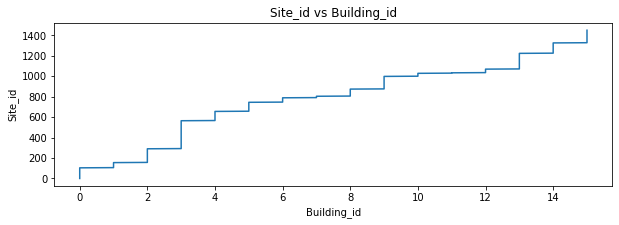

In [55]:
plt.figure(figsize=(10,3))
plt.plot(building_df.site_id,building_df.building_id);
plt.title("Site_id vs Building_id")
plt.xlabel('Building_id')
plt.ylabel('Site_id')
plt.show()

yes building are provided ids based on sites. Site 3 has highest number of buildings

In [58]:
#Checking how many unique buildings and sites we have
print('unique buidings: ',building_df.building_id.nunique(),"  Unique Sites : ",building_df.site_id.nunique())


unique buidings:  1449   Unique Sites :  16


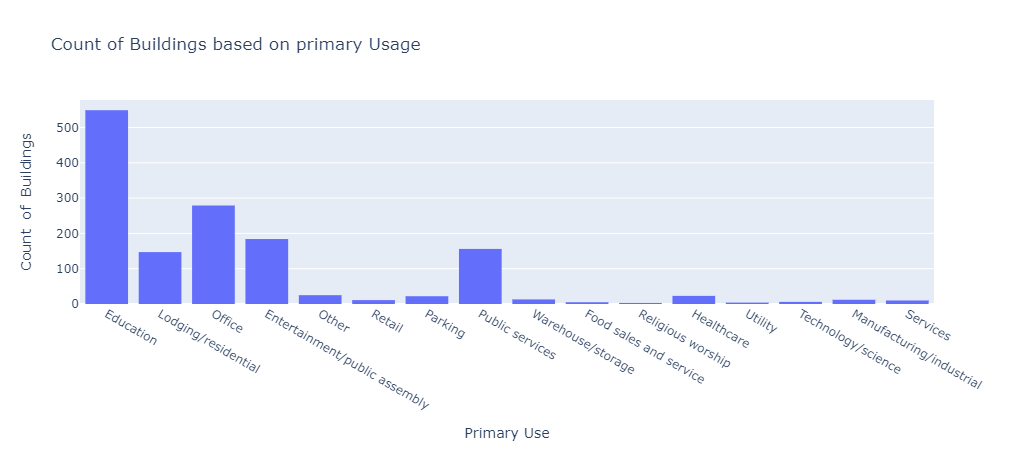

In [10]:
#checking Count of buildings based on their usage'
fig=px.histogram(building_df,'primary_use',histfunc='count',title='Count of Buildings based on primary Usage')
fig.update_yaxes(title_text="Count  of  Buildings",);
fig.update_xaxes(title_text="Primary Use",);
fig.show();

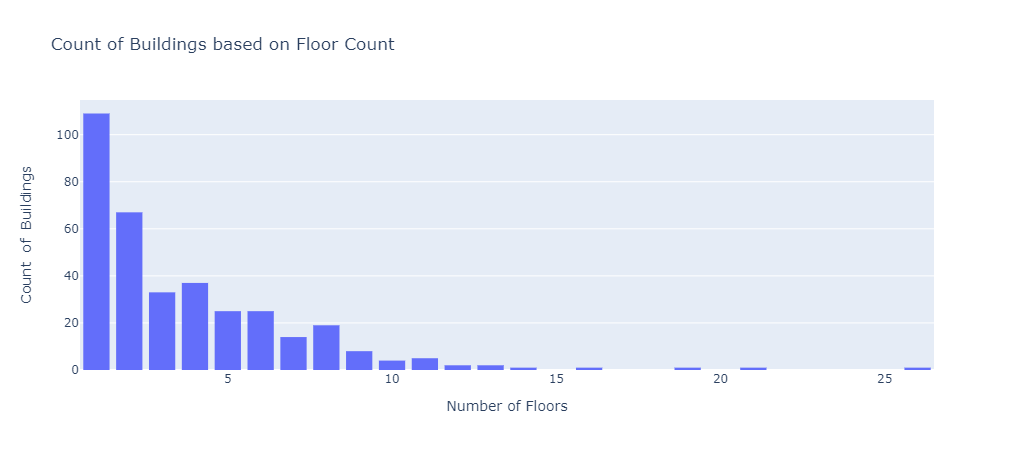

In [11]:
# plotting Count of Buildings based on Floor Count 
fig=px.histogram(building_df,'floor_count',title='Count of Buildings based on Floor Count')
fig.update_layout(bargap=0.2)
fig.update_yaxes(title_text="Count  of  Buildings",);

fig.update_xaxes(title_text="Number of Floors",)


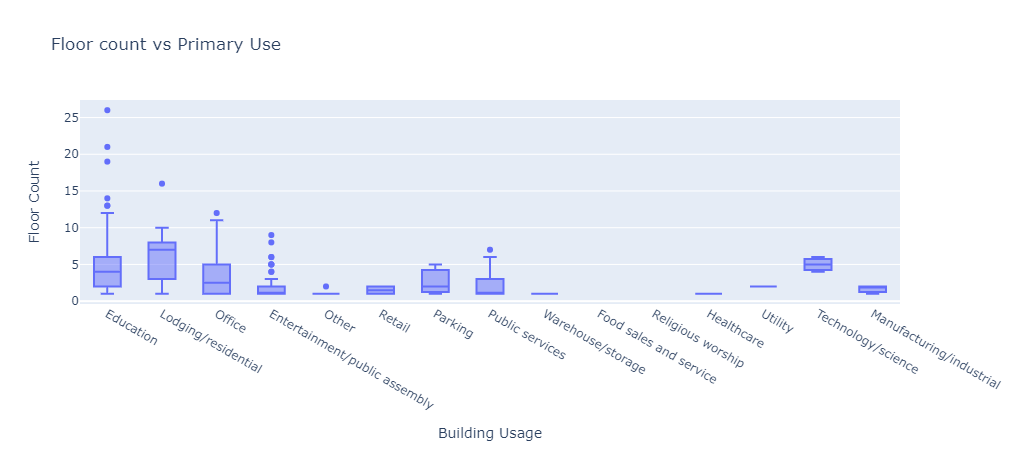

<Figure size 1008x432 with 0 Axes>

In [12]:
plt.figure(figsize=(14,6))
fig=px.box(building_df,x='primary_use',y='floor_count',title='Floor count vs Primary Use');
fig.update_yaxes(title_text="Floor Count",);
fig.update_xaxes(title_text="Building Usage");
fig.show();

There is huge variation of floor count for almost all usages. Ones it seemed to be tempting to fill floor count based on mean of floor counts we have buildings for same usage. But after this visualisation that seem to make sense.

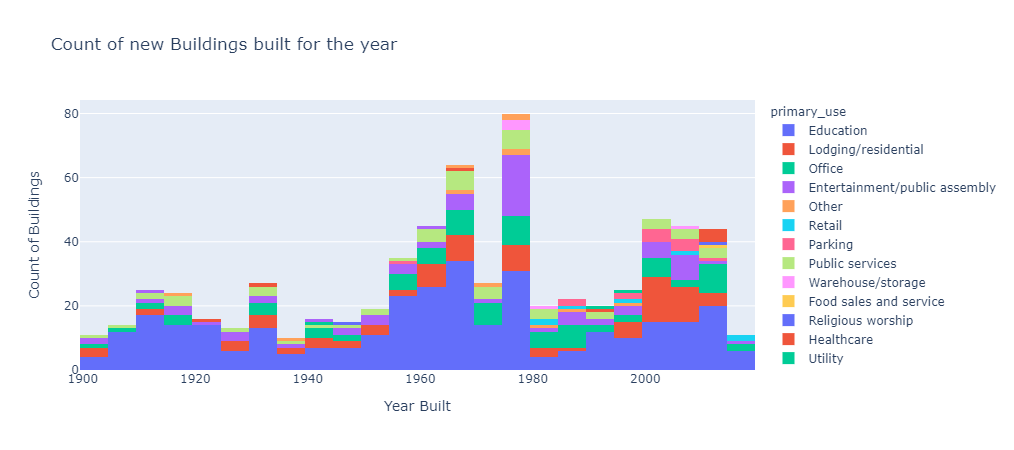

In [13]:
fig=px.histogram(building_df,'year_built',color='primary_use',title='Count of new Buildings built for the year')
fig.update_yaxes(title_text="Count of Buildings",);
fig.update_xaxes(title_text="Year Built")

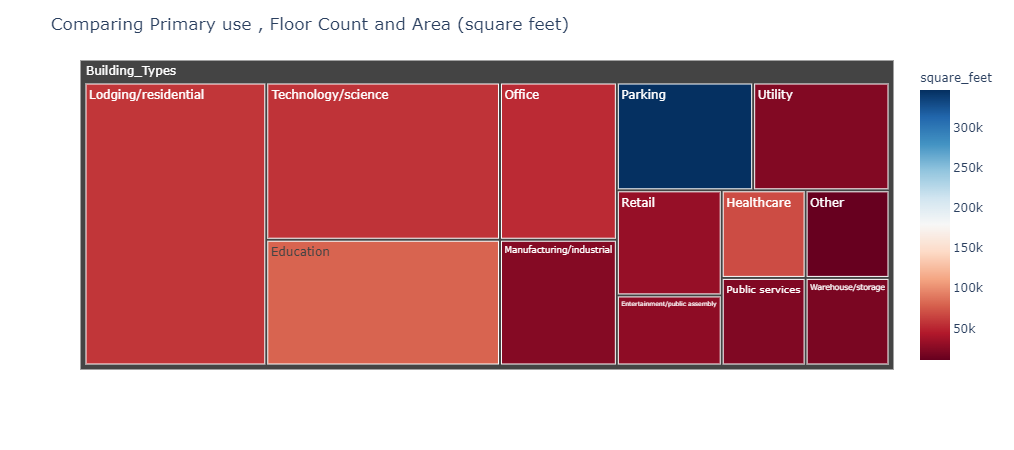

In [14]:
fig=px.treemap((building_df.groupby("primary_use").median()).reset_index(),
               path=[px.Constant("Building_Types"),'primary_use'],
               values=f'floor_count',color=f'square_feet',
              color_continuous_scale='RdBu'
                  )
fig.update_layout(title="Comparing Primary use , Floor Count and Area (square feet)") # adding title for graph
fig.show()

There is no much evidence that floor count and square feet have any linear relation. So dropping floor count and year built would be a good decision.

## Exploring Train CSV

In [15]:
# Setting training_dtypes based on very first section when we checked files with terminal commands
training_dtypes={"building_id":"int16","meter":"int16","meter_reading":"float32"}
train_df=pd.read_csv("/kaggle/input/ashrae-energy-prediction/train.csv",dtype=training_dtypes)

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 20216100 entries, 0 to 20216099

Data columns (total 4 columns):

 #   Column         Dtype  

---  ------         -----  

 0   building_id    int16  

 1   meter          int16  

 2   timestamp      object 

 3   meter_reading  float32

dtypes: float32(1), int16(2), object(1)

memory usage: 308.5+ MB


In [16]:
train_df.describe()

building_id         meter  meter_reading
count  2.021610e+07  2.021610e+07   2.021610e+07
mean   7.992780e+02  6.624412e-01   2.117122e+03
std    4.269133e+02  9.309921e-01   1.532356e+05
min    0.000000e+00  0.000000e+00   0.000000e+00
25%    3.930000e+02  0.000000e+00   1.830000e+01
50%    8.950000e+02  0.000000e+00   7.877500e+01
75%    1.179000e+03  1.000000e+00   2.679840e+02
max    1.448000e+03  3.000000e+00   2.190470e+07

In [36]:
print("Total unique buildings in Train.csv: ",train_df.building_id.nunique())
print("Unique meters in Train.csv: ",train_df.meter.unique())

Total unique buildings in Train.csv:  1449

Unique meters in Train.csv:  [0 3 1 2]


In [30]:
train_df.isna().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

Wow we donot have any missing value in this file.<br>
Now, meter_reading is our target column. So we should check if we have any outliers for this meter.
<br> before that we should also check timestamps

In [13]:
print(train_df.timestamp.min())
print(train_df.timestamp.max())
print(train_df.timestamp.nunique())

2016-01-01 00:00:00

2016-12-31 23:00:00

8784


So we have data for all hours in train file from start to end of 2016.<br>
Let's analyse meter columns

In [17]:
x1=train_df.groupby('meter')
display(x1.describe())
del x1
gc.collect()

building_id                                                         \
            count         mean         std    min    25%     50%     75%   
meter                                                                      
0      12060910.0   706.647989  415.233026    0.0  345.0   698.0  1063.0   
1       4182440.0   887.157200  430.557773    7.0  747.0   990.0  1242.0   
2       2708713.0  1105.916492  198.430593  745.0  933.0  1119.0  1287.0   
3       1264037.0   735.242757  508.856977  106.0  212.0  1003.0  1255.0   

              meter_reading                                             \
          max         count          mean            std  min      25%   
meter                                                                    
0      1448.0    12060910.0    170.825485     380.834290  0.0  19.5000   
1      1413.0     4182440.0    633.363831    7988.212891  0.0  11.3288   
2      1442.0     2708713.0  13882.191406  418313.531250  0.0  45.7500   
3      1331.0     1264037.0    385.866821    2508.172363  0.0   0.0000   

                                            
              50%          75%         max  
meter                                       
0       62.831900   170.074997     79769.0  
1      120.487000   464.313995    880374.0  
2      257.812012  1035.319946  21904700.0  
3       39.623699   241.285004    160187.0

2551

So from above data we can sense that their are very huge outliers for every meter. It would be better to train different models for different meters. May be to save some time we can club meter 1 and meter 3 data ( which seem to have intermediate values). But there should be separate models for meters 1 and 2.

Also count of rows decreases as the meter number increases

In [46]:
x1=len(train_df[train_df.meter_reading==0])*100/len(train_df)
print("percent rows with reading 0 : ",x1)
del x1
gc.collect()

percent rows with reading 0 :  9.269720668180312


It is mentioned in the competition that the meter readings 0 can be erratic though reason behind it is not well known. So, we will remove these values as well as they are just 9% of the total dataset.

In [95]:
train_df.drop(train_df.loc[train_df['meter_reading']==0].index, inplace=True)

Now we should consider removing outliers for all meters as well. But before that let's visualize a sample of this training file.

In [14]:
for _ in range(4):
    print(f"For meter {_} unique building count",train_df[train_df.meter==_].building_id.nunique())#*100/t_df.building_id.nunique()

For meter 0 unique building count 1413

For meter 1 unique building count 498

For meter 2 unique building count 324

For meter 3 unique building count 145


In [122]:
# Removing top five percent of values
def see_v_counts(meterno,r1,r2,r3,high=True):
    m0_df=train_df[train_df.meter==meterno]
    if high:
        for _ in range(r1,r2,r3):
             y=m0_df[m0_df.meter_reading>_]
             x=len(y)*100/len(m0_df)
             print(f"Above {_} %values",x," unique buildings - ",y.building_id.nunique(),'rows: ',len(y))
    else:
        for _ in range(r1,r2,r3):
            y=m0_df[m0_df.meter_reading<_]
            x=len(y)*100/len(m0_df)
            print(f"Below {_} %values",x," unique buildings - ",y.building_id.nunique(),'rows: ',len(y))
            if x >5:
                break
    if y.building_id.nunique()<7:
        print('building_ids - ',y.building_id.unique())
def spot_outliers(meterno,value,high=True):
    df_0=train_df[train_df.meter==meterno]
   
    if high:
        y=df_0[df_0.meter_reading>value]
        print(f"Total buildings for meter {meterno} - ",df_0.building_id.nunique(),
              f"Unique buildings above {value} - ",y.building_id.nunique(), 
              f"Total rows above {value} - ",len(y))
        n=df_0[df_0['building_id'].isin(list(y.building_id.unique()))]
        x=n[n['meter_reading']>value*.7]
        print(f"Total rows for these building_ids above {value*.7} - ",len(x))
    else: 
        y=df_0[df_0.meter_reading<value]
        print(f"Total buildings for meter {meterno} - ",df_0.building_id.nunique(),
              f"Unique buildings below {value} - ",y.building_id.nunique(), 
              f"Total rows below {value} - ",len(y))
        n=df_0[df_0['building_id'].isin(list(y.building_id.unique()))]
        x=n[n['meter_reading']<value*7]
        print(f"Total rows for these building_ids below {value*7} - ",len(x))
    print(f"Total rows with these building_ids for meter {meterno} - ",len(n))
    print("Percentage",len(y)*100/len(n))
    print("Total_rows for meter ",len(df_0))

In [101]:
# For meter 1
see_v_counts(1,9000,100000,10000)

Above 9000 %values 0.42167526580176157  unique buildings -  48 rows:  14868

Above 19000 %values 0.08777811054993624  unique buildings -  18 rows:  3095

Above 29000 %values 0.03760703540847026  unique buildings -  10 rows:  1326

Above 39000 %values 0.03392007115273788  unique buildings -  7 rows:  1196

Above 49000 %values 0.033778264835209716  unique buildings -  7 rows:  1191

Above 59000 %values 0.03366481978118718  unique buildings -  5 rows:  1187

Above 69000 %values 0.03340956840963648  unique buildings -  5 rows:  1178

Above 79000 %values 0.03315431703808577  unique buildings -  5 rows:  1169

Above 89000 %values 0.03287070440302944  unique buildings -  5 rows:  1159

Above 99000 %values 0.03264381429498437  unique buildings -  5 rows:  1151

building_ids -  [  60  778 1088  954  993]


In [22]:
df1=train_df.query("meter==1")
df1[df1.meter_reading>19000].building_id.value_counts()

1284    1850
778      838
1088     338
993       15
927       12
1289      11
903        8
955        7
954        5
946        3
900        1
961        1
934        1
1321       1
879        1
103        1
60         1
973        1
Name: building_id, dtype: int64

In [20]:
df1[df1.building_id.isin( [778,1088,1284])].groupby('building_id').meter_reading.describe()

count          mean            std      min         25%  \
building_id                                                             
778          8085.0  54209.910156  163961.687500   0.0000    0.000000   
1088         8783.0   9529.541992   46390.039062  17.0765   91.192699   
1284         8784.0   9522.456055    9116.931641   0.0000  967.881012   

                     50%           75%            max  
building_id                                            
778             0.000000      0.000000  880374.000000  
1088          197.421005   1587.634949  356640.000000  
1284         6329.564941  17127.375488   33059.699219

Remove values above 32000

In [117]:
see_v_counts(1,0,10,1,False)

Below 0 %values 0.0  unique buildings -  0 rows:  0

Below 1 %values 2.354183399812135  unique buildings -  286 rows:  83007

Below 2 %values 3.864307236433106  unique buildings -  319 rows:  136253

Below 3 %values 5.225704607230534  unique buildings -  342 rows:  184255


In [124]:
spot_outliers(1,.0005,False)

Total buildings for meter 1 -  498 Unique buildings below 0.0005 -  10 Total rows below 0.0005 -  517

Total rows for these building_ids below 0.0035 -  2114

Total rows with these building_ids for meter 1 -  60657

Percentage 0.852333613597771

Total_rows for meter  3525936


In [23]:
df1[df1.meter_reading<0.0003].building_id.value_counts()

1018    8772
1022    8766
1013    7643
252     7504
1093    7458
        ... 
1352       1
1073       1
1389       1
1384       1
1368       1
Name: building_id, Length: 437, dtype: int64

In [136]:
del df1
del t_df
gc.collect()

59772

Similarly very low lying and very high lying values were found for all meters.<br>
For meter 1 - remove values below 0.0003 and above 33000. Exceptional building ids - 1088,778,1284,1013(low)<br>
For meter 2 - remove values below 0.02 and above 37000. Exceptional building ids - 799,740(low),304(low)<br>
For meter 3 - remove values below 0.05 and above 21000. Exceptional building ids - 1099,1168,1197,1159,1148<br>
For meter 0 - remove values below 0.005 and above 9000. Exceptional building ids - 1021,1258,1331,794,1241(low),1253(low)<br>

The score matrix we have been provided in the competition is logarithmic mse. So lower prdictions will be punished lesser than higher predictions. That is why we should be very conservative while removing any low lying values.

## Analysing Building and Training files merged together

In [24]:
bt_df=pd.merge(train_df,building_df,on='building_id',how='left')

In [25]:
bts_df=bt_df.sample(frac=0.002)

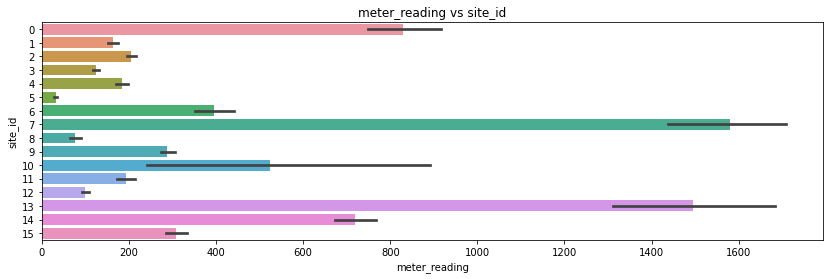

In [140]:
plt.figure(figsize=(14,4))
fig = sns.barplot(
    x="meter_reading",
    y="site_id",
    data=bts_df[bts_df.meter_reading<500000],
    orient="h"
)

plt.title("meter_reading vs site_id");


Surely we should use site id as categorical column

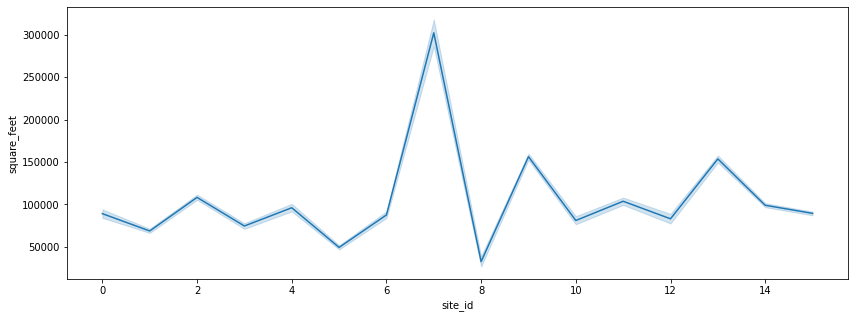

In [142]:
plt.figure(figsize=(14,5))
sns.lineplot(x=bts_df['site_id'],y=bts_df['square_feet']);

There Seems  strong relation between square_feet and meter reading

In [26]:
bts_df.corr()

building_id     meter  meter_reading   site_id  square_feet  \
building_id       1.000000  0.221477       0.010268  0.981018     0.089451   
meter             0.221477  1.000000       0.021039  0.252933     0.134981   
meter_reading     0.010268  0.021039       1.000000  0.014089     0.028495   
site_id           0.981018  0.252933       0.014089  1.000000     0.090554   
square_feet       0.089451  0.134981       0.028495  0.090554     1.000000   
year_built       -0.238043 -0.013519       0.118817 -0.206404     0.120752   
floor_count      -0.350050  0.163240       0.113402 -0.339621     0.572986   

               year_built  floor_count  
building_id     -0.238043    -0.350050  
meter           -0.013519     0.163240  
meter_reading    0.118817     0.113402  
site_id         -0.206404    -0.339621  
square_feet      0.120752     0.572986  
year_built       1.000000     0.128010  
floor_count      0.128010     1.000000

There's least strong correlation between the square feet and meter reading, may be above visualization appeared that way because there is huge variation of values.

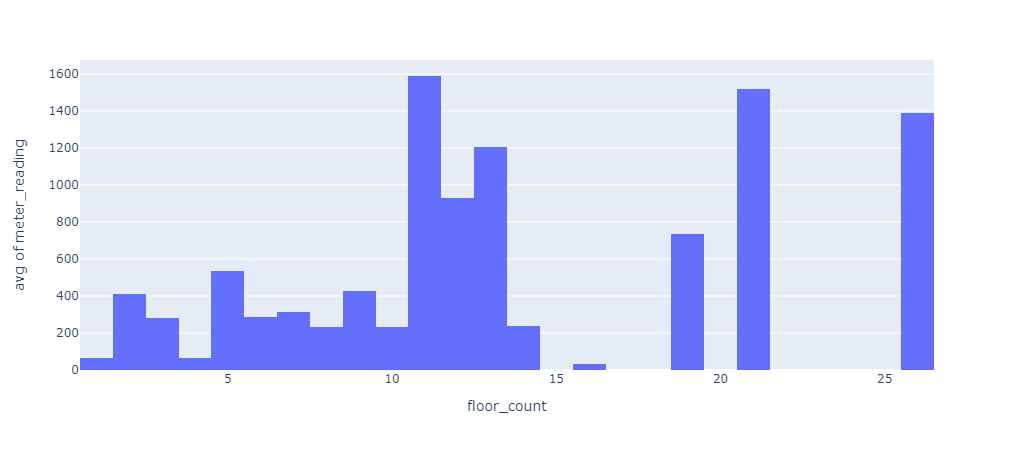

In [27]:
px.histogram(bts_df[bts_df.meter_reading<500000],x='floor_count',y='meter_reading',histfunc='avg')

Appears good relation between floor count and meter reading. We can imput floor count based on meter readings. But there's huge variation in meter_readings and we have only 25% of values for floor count. So idea to impute floor count was rejected. 

In [28]:
bts_df['square_feet_log1p']=bts_df.square_feet.apply(lambda x:np.log1p(x))

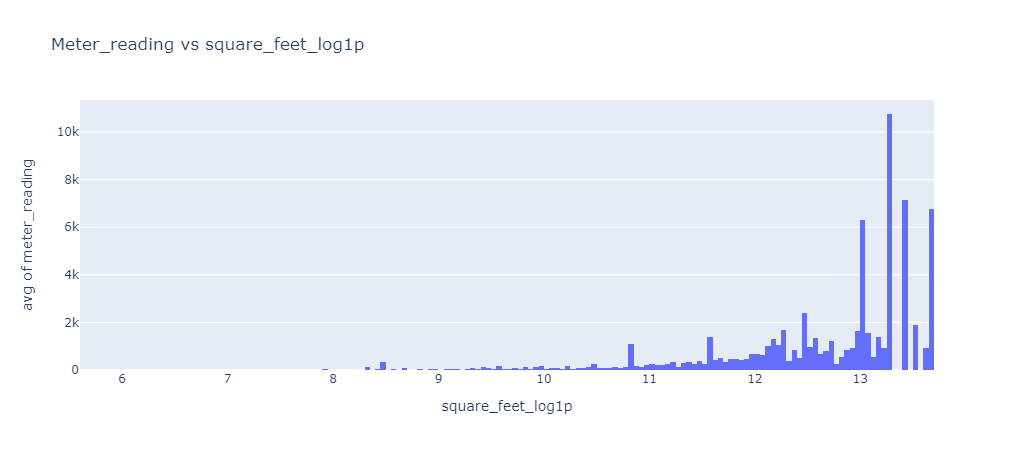

In [31]:
px.histogram(bts_df[bts_df.meter_reading<1000000],x='square_feet_log1p',y='meter_reading',histfunc='avg',
             title="Meter_reading vs square_feet_log1p")

That's awesome we see a very clear relationship between these two columns. So rather than giving square feet as feature we should use log normalized squarefeet to the model. This is good feature creation.<br>
Also the meter reading values are highly skewed let's apply log normalisation to that as well. The competition score will also be calculated based on RMSLE.

In [40]:
bts_df['meter_Reading_log1p']=np.log1p(bts_df.meter_reading)

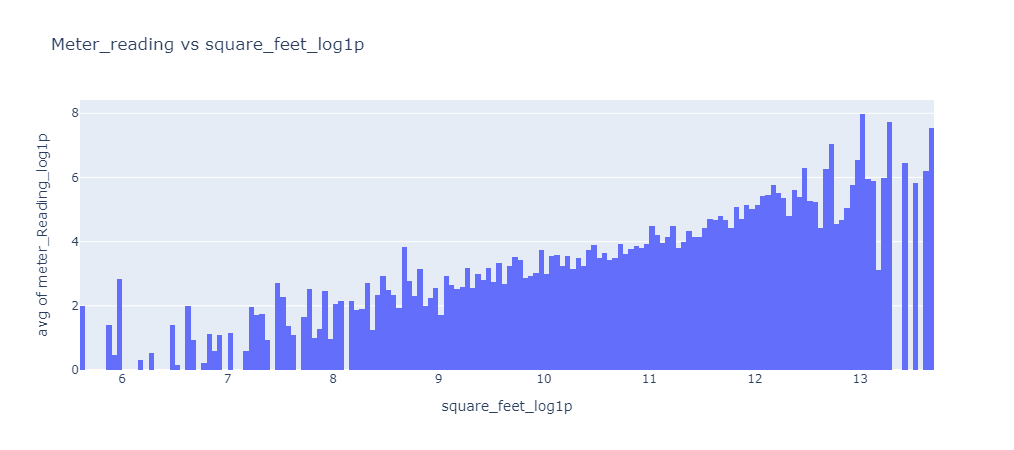

In [44]:
px.histogram(bts_df,y='meter_Reading_log1p',x='square_feet_log1p',histfunc='avg',
             title="Meter_reading vs square_feet_log1p")

We observe directly proportional relationship 

## Exploring Weather files

In [148]:
!head {data_dir}/weather_train.csv

site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed

0,2016-01-01 00:00:00,25.0,6.0,20.0,,1019.7,0.0,0.0

0,2016-01-01 01:00:00,24.4,,21.1,-1.0,1020.2,70.0,1.5

0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0

0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0

0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6

0,2016-01-01 05:00:00,19.4,,19.4,0.0,,0.0,0.0

0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0

0,2016-01-01 07:00:00,21.1,,21.1,0.0,1018.8,210.0,1.5

0,2016-01-01 08:00:00,20.6,,20.0,0.0,1018.1,0.0,0.0


In [46]:

weather_train_df = pd.read_csv('/kaggle/input/ashrae-energy-prediction/weather_train.csv',dtype={'site_id':'int16'})
weather_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int16  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int16(1), object(1)
memory usage: 8.8+ MB


In [47]:
weather_train_df.describe()

site_id  air_temperature  cloud_coverage  dew_temperature  \
count  139773.000000    139718.000000    70600.000000    139660.000000   
mean        7.478977        14.418106        2.149306         7.350158   
std         4.604744        10.626595        2.599150         9.790235   
min         0.000000       -28.900000        0.000000       -35.000000   
25%         3.000000         7.200000        0.000000         0.600000   
50%         7.000000        15.000000        2.000000         8.300000   
75%        11.000000        22.200000        4.000000        14.400000   
max        15.000000        47.200000        9.000000        26.100000   

       precip_depth_1_hr  sea_level_pressure  wind_direction     wind_speed  
count       89484.000000       129155.000000   133505.000000  139469.000000  
mean            0.983047         1016.158038      180.526632       3.560527  
std             8.463678            7.629684      111.523629       2.335874  
min            -1.000000          968.200000        0.000000       0.000000  
25%             0.000000         1011.800000       80.000000       2.100000  
50%             0.000000         1016.400000      190.000000       3.100000  
75%             0.000000         1020.800000      280.000000       5.000000  
max           343.000000         1045.500000      360.000000      19.000000

In [154]:
print("For Weather \nMax time Reading - ",weather_train_df.timestamp.max(),
      "\nMin time Reading - ",weather_train_df.timestamp.min())
print("For Train \nMax time Reading - ",train_df.timestamp.max(),
      "\nMin time Reading - ",train_df.timestamp.min())

For Weather 

Max time Reading -  2016-12-31 23:00:00 

Min time Reading -  2016-01-01 00:00:00

For Train 

Max time Reading -  2016-12-31 23:00:00 

Min time Reading -  2016-01-01 00:00:00


In [156]:
print(train_df.timestamp.nunique())
weather_train_df.timestamp.nunique()

8784


8784

Seems like we have all timestamps there in weather files as well

In [48]:
weather_train_df.isna().sum()/len(weather_train_df)

site_id               0.000000
timestamp             0.000000
air_temperature       0.000393
cloud_coverage        0.494895
dew_temperature       0.000808
precip_depth_1_hr     0.359791
sea_level_pressure    0.075966
wind_direction        0.044844
wind_speed            0.002175
dtype: float64

In [160]:
weather_train_df.sort_values(by=['site_id','timestamp'],inplace=True)

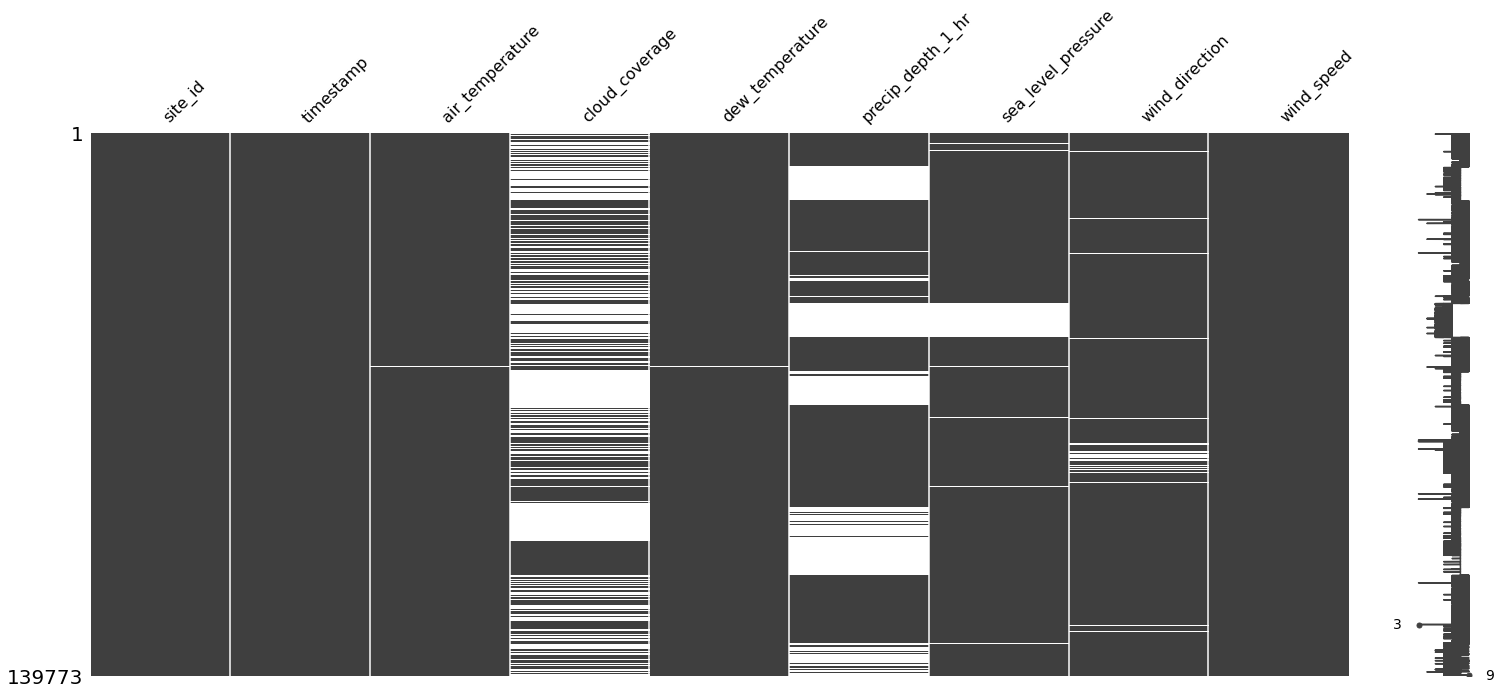

In [161]:
#import missingno as msg
msg.matrix(weather_train_df);

Cloud coverage, precipitation, sea level pressure seem to have lot of effect on energy consumption of that day. But there are huge chuncks of missing values and impute them could be challenging. Interpolating will only work well if the missing value gap is low. Now we would have to go by generalized imputing like with mean of day or the hour for whole month if we donot have any value for some days. 

In [165]:
print("Number of Hours for each site id in weather train file: ",len(weather_train_df)/weather_train_df.site_id.nunique())

Number of Hours for each site id in weather train file:  8735.8125


**Here's the catch**<br>
There are missing timestamps for sites. The avegare was expected to be 8784 but it's lesser. Let's explore this more

In [167]:
should_be=8784
for i in range(16):
    x=weather_train_df[weather_train_df.site_id==i].timestamp.nunique()
    print(f'For site {i} unique timestamps are: ',x," number of missing hours :",should_be-x)

For site 0 unique timestamps are:  8784  number of missing hours : 0

For site 1 unique timestamps are:  8763  number of missing hours : 21

For site 2 unique timestamps are:  8783  number of missing hours : 1

For site 3 unique timestamps are:  8780  number of missing hours : 4

For site 4 unique timestamps are:  8783  number of missing hours : 1

For site 5 unique timestamps are:  8755  number of missing hours : 29

For site 6 unique timestamps are:  8782  number of missing hours : 2

For site 7 unique timestamps are:  8614  number of missing hours : 170

For site 8 unique timestamps are:  8784  number of missing hours : 0

For site 9 unique timestamps are:  8780  number of missing hours : 4

For site 10 unique timestamps are:  8782  number of missing hours : 2

For site 11 unique timestamps are:  8614  number of missing hours : 170

For site 12 unique timestamps are:  8755  number of missing hours : 29

For site 13 unique timestamps are:  8783  number of missing hours : 1

For site 

Let's find missing hours for all sites and add them into our dataset so that when we mearge it with training data to make our final dataframe we donot have any missing values there.

In [6]:
import datetime
time_format = "%Y-%m-%d %H:%M:%S"
first_date = datetime.datetime.strptime(weather_train_df['timestamp'].min(),time_format)
total_hours=24*366
all_hours=[]
for _ in range(total_hours):
     all_hours.append((first_date + datetime.timedelta(hours=_)).strftime(time_format))
len(all_hours)


8784

In [ ]:
for site_id in range(16):
    site_hours = weather_train_df[weather_train_df['site_id'] == site_id]['timestamp']
    missing_hours_df= pd.DataFrame(np.setdiff1d(all_hours,site_hours),columns=['timestamp'])
    missing_hours_df['site_id'] = site_id
    weather_train_df = pd.concat([weather_train_df,missing_hours_df])
weather_train_df = weather_train_df.reset_index(drop=True)     
del site_hours,missing_hours_df

In [8]:
for i in range(16):
    x=weather_train_df[weather_train_df.site_id==i].timestamp.nunique()
    print(f'For site {i} unique timestamps are ',x)

For site 0 unique timestamps are  8784

For site 1 unique timestamps are  8784

For site 2 unique timestamps are  8784

For site 3 unique timestamps are  8784

For site 4 unique timestamps are  8784

For site 5 unique timestamps are  8784

For site 6 unique timestamps are  8784

For site 7 unique timestamps are  8784

For site 8 unique timestamps are  8784

For site 9 unique timestamps are  8784

For site 10 unique timestamps are  8784

For site 11 unique timestamps are  8784

For site 12 unique timestamps are  8784

For site 13 unique timestamps are  8784

For site 14 unique timestamps are  8784

For site 15 unique timestamps are  8784


Now every thing is fine. Let start filling missing values. Filling by mean of day seems good strategy. But we have a number of missing values so it may be possible we donot have any value for some days. But let's give it a try.

In [ ]:
weather_train_df['hour']=weather_train_df.timestamp.dt.hour
weather_train_df['day']=weather_train_df.timestamp.dt.day
weather_train_df['month']=weather_train_df.timestamp.dt.month
weather_train_df.set_index(['site_id','month','day'],inplace=True


In [ ]:
weather_features=['cloud_coverage','air_temperature','dew_temperature','sea_level_pressure','precip_depth_1_hr']
for i in (weather_features):
    filler = weather_train_df.groupby(['site_id','month','day'])[f'{i}'].mean()
    filler = pd.DataFrame(filler.fillna(method='ffill'),columns=[f"{i}"])
    weather_train_df.update(filler,overwrite=False)
weather_train_df=weather_train_df[weather_features]            
weather_train_df.reset_index(inplace=True)
weather_train_df.isna().sum()

Fortunately there is no missing value now. So with this we have figured out how to clean and prepare all our training data 

# Preparing Data for Training
**DATA CLEANING , IMPUTING MISSING VALUES, FEATURE ENGINEERING, DATA PREPROCESSING**<br>
Based on above EDA and proposed strategies to clean, fill, add features, encode and scale the values. Let's define some basic functions to get our data prepared, so that writing code again and again can be avoided.

In [14]:
def prepare_weather(w_df):
     
    # Finding missing timestamps and adding them to weather data
   
    all_hours=list(w_df.timestamp.unique()) # getting unique timestamps
    for site_id in range(16):
        # getting hours/timestamps for the site
        site_hours = weather_train_df[weather_train_df['site_id'] == site_id]['timestamp']
        # Finding missing timestamps using setdiff1d
        missing_hours_df= pd.DataFrame(np.setdiff1d(all_hours,site_hours),columns=['timestamp'])
        missing_hours_df['site_id'] = site_id
        # concating missing timestaamps with weather data
        w_df = pd.concat([w_df,missing_hours_df])
    w_df = w_df.reset_index(drop=True)  
    # deleting unrequired features to reduce memory
    del site_hours,missing_hours_df 
    
    # converting timestamp to datetime and adding features so that we can impute missing values
    w_df['timestamp1']=pd.to_datetime(weather_train_df.timestamp)
    w_df['hour']=w_df.timestamp1.dt.hour
    w_df['day']=w_df.timestamp1.dt.day
    w_df['month']=w_df.timestamp1.dt.month
    # changing index so that grouping operation can be don efficiently
    w_df.set_index(['site_id','month','day'],inplace=True)
    # Listing all weather features we want to give to our training data
    w_features=['cloud_coverage','air_temperature','dew_temperature','sea_level_pressure','precip_depth_1_hr']
    # Filling missing values based on mean for that day               
    for i in (w_features):
        filler = w_df.groupby(['site_id','month','day'])[f'{i}'].mean()
        filler = pd.DataFrame(filler.fillna(method='ffill'),columns=[f"{i}"])
        w_df.update(filler,overwrite=False)
    w_features+=['site_id','timestamp'] 
    w_df=w_df[w_features]    # keeping only useful features      
    w_df.reset_index(inplace=True) #resetting index again
    return w_df

Function to prepare Building Dataframe. As discusssed in EDA section, we will be removing Floor count, year built columns and scale the values for square_feet columns as there is huge variation. However, we will still be scaling numerical columns while preparing main dataset.

In [ ]:
def prepare_building(b_df):
    b_df.drop(['floor_count','year_built'],axis=1,inplace=True)
    b_df['square_feet'] =  np.log1p(b_df['square_feet'])
    return b_df

In [ ]:
def prepare_main_df(df,w_df,b_df,train=True):
    if train:
        df = df.query('meter_reading!=0')
        df['meter_reading']=np.log1p(df['meter_reading'])
    
    df['timestamp']=pd.to_datetime(df['timestamp'],format="%Y-%m-%d %H:%M:%S")
    df["hour"] = df["timestamp"].dt.hour
    df["month"] = df["timestamp"].dt.month
    df['weekday']=df['timestamp'].dt.dayofweek
        
    return df
    

In [ ]:
def get_sub_dfs(train_df,train=True):
    train0_df=train_df[train_df['meter']==0].copy()
    train0_df_1=train0_df.query("building_id == [693,112,799]").copy()
    train0_df=train0_df.query("building_id != [799,740,112,693,304]")
    if train:
        train0_df=train0_df.query("meter_reading < 9000 & meter_reading > 0.005")
    
    train1_df=train_df[train_df['meter']==1].copy()
    train1_df_1=train1_df.query("building_id == [778,1088,1013,1284]")
    train1_df=train1_df.query("building_id != [778,1088,1013,1284]")
    if train:
        train1_df=train1_df.query("meter_reading < 19000 & meter_reading > 0.001")
    
    train2_df=train_df[train_df['meter']==2].copy()
    train2_df_1=train2_df.query("building_id == [1168,1197,1159,1148,1099]").copy()
    train2_df=train2_df.query("building_id != [1168,1197,1159,1148,1099]")
    if train:
        train2_df_1.drop(train2_df_1.loc[train2_df_1['meter_reading']<100].index, inplace=True)
        train2_df=train2_df.query("meter_reading < 37000 & meter_reading > 0.04")
    train3_df=train_df[train_df['meter']==3].copy()
    train3_df_1=train3_df.query("building_id == [1241,1253,1258,1331,794,1021]")
    train3_df=train3_df.query("building_id != [1241,1253,1258,1331,794,1021]")
    if train:
        train3_df=train3_df.query("meter_reading < 9000 & meter_reading > 0.05")
    return train0_df,train0_df_1,train1_df,train1_df_1,train2_df,train2_df_1,train3_df,train3_df_1
   

MinMax scaler and One hot encoding will be used to scale and encode numeric and categorical features

In [31]:
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [32]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

Defining a function to merge required datafames and get a sample to train the model. This is being done beacuse we have huge data size training the whole data will take lots and lots of time. So we will just be training our models by giving it a sample of whole dataframe.

In [33]:
def dataset_sample_meter(training_df,sample_fraction,num_cols,cat_cols,scaler,encoder,test=False):
    # merging with building_df
    # merging with weather data
    bt_df=pd.merge(training_df,building_df,on='building_id',how='left')
    if test:
        wbt_df=pd.merge(bt_df,weather_test_df,how='left',on=['site_id','timestamp'])
        wbt_df.sort_values(by=['site_id','timestamp'],inplace=True)
        return wbt_df

    wbt_df=pd.merge(bt_df,weather_train_df,on=['site_id','timestamp'],how='left')
    wbt_df.sort_values(by=['site_id','timestamp'],inplace=True)
    # fitting scaler and encoder
    scaler.fit(wbt_df[num_cols])
    encoder.fit(wbt_df[cat_cols])
    # getting a sample
    s_df=wbt_df.sample(frac=sample_fraction,random_state=5)
    return wbt_df,s_df

Now we need to preprocess the data by scaling, encoding and spliting dataframe into training and validation sets and return the inputs and target values that we need to gve to our models.

In [34]:
def preprocess_data(df0,num_cols,cat_cols,target_col,scaler,encoder):
    df0[num_cols]=scaler.transform(df0[num_cols])
    encoded_cols = list(encoder.get_feature_names_out(cat_cols))
    df0[encoded_cols] = encoder.transform(df0[cat_cols])
    df0=df0[num_cols+encoded_cols+[target_col]]
    t_df0, v_df0 = train_test_split(df0, test_size=0.3, random_state=42)
    t_targets=t_df0[target_col]
    v_targets=v_df0[target_col]
    t_inputs=t_df0[num_cols+encoded_cols]
    v_inputs=v_df0[num_cols+encoded_cols]
    return t_inputs,v_inputs,t_targets,v_targets

In [35]:
# Defining another function for test data
def preprocess_test_data(df0,num_cols,cat_cols,scaler,encoder):
    df0[num_cols]=scaler.transform(df0[num_cols])
    encoded_cols = list(encoder.get_feature_names_out(cat_cols))
    df0[encoded_cols] = encoder.transform(df0[cat_cols])
    test_inputs=df0[num_cols+encoded_cols]
    return test_inputs

# Training ML Models

In [7]:
%%time
training_dtypes={"building_id":"int16","meter":"int16","meter_reading":"float32"}
train_df=pd.read_csv("/kaggle/input/ashrae-energy-prediction/train.csv",dtype=training_dtypes)
building_dtypes={'site_id':'int16','building_id':'int16','square_feet':'float32'}
building_df=pd.read_csv("/kaggle/input/ashrae-energy-prediction/building_metadata.csv",dtype=building_dtypes)
weather_train_df = pd.read_csv('/kaggle/input/ashrae-energy-prediction/weather_train.csv',dtype={'site_id':'int16'})
weather_test_df=pd.read_csv('/kaggle/input/ashrae-energy-prediction/weather_test.csv',dtype={'site_id':'int16'})
test_df=pd.read_csv("/kaggle/input/ashrae-energy-prediction/test.csv",dtype=training_dtypes)

CPU times: user 20.4 s, sys: 2.76 s, total: 23.1 s

Wall time: 47.4 s


In [ ]:
train_df=prepare_main_df(train_df)
test_df=prepare_main_df(test_df)

In [ ]:
train0_df,train0_df_1,train1_df,train1_df_1,train2_df,train2_df_1,train3_df,train3_df_1=get_sub_dfs(train_df)
test0_df,test0_df_1,test1_df,test1_df_1,test2_df,test2_df_1,test3_df,test3_df_1=get_sub_dfs(test_df,train=False)
del train_df,test_df
gc.collect()

In [14]:
x=(len(test0_df)/4)
x=math.floor(x)
test01_df=test0_df[x:x*2].copy()
test02_df=test0_df[x*2:x*3].copy()
test03_df=test0_df[x*3:].copy()
test0_df=test0_df[:x]
del x

Defining  a function to check if tune hyperparameters of our models

In [36]:
def train_model(Model,params,param_name,r,t_inputs,v_inputs,t_targets,v_targets):
    param_values,train_losses,val_losses=[],[],[]
    for _ in r:
        if isinstance(_,float):
            _=False
            break
    # As range function does not work with decimal values , so adding this piece of code.
    if _==False:
        _=r[0]
        while _ < r[1]:
            params[param_name]=_
            model = Model(n_jobs=-1, random_state=42,**params)
            model.fit(t_inputs, t_targets)
            t_preds=model.predict(t_inputs)
            t_loss=rmse(t_preds,t_targets)
            v_preds=model.predict(v_inputs)
            v_loss=rmse(v_preds,v_targets)
            print(f'For {_}: ',t_loss,v_loss)
            train_losses.append(t_loss)
            val_losses.append(v_loss)
            param_values.append(_)
            _+=r[2]
    else:
        for _ in range(r[0],r[1],r[2]):
            params[param_name]=_
            model = Model(n_jobs=-1, random_state=42,**params)
            model.fit(t_inputs, t_targets)
            t_preds=model.predict(t_inputs)
            t_loss=rmse(t_preds,t_targets)
            v_preds=model.predict(v_inputs)
            v_loss=rmse(v_preds,v_targets)
            print(f'For {_}: ',t_loss,v_loss)
            train_losses.append(t_loss)
            val_losses.append(v_loss)
            param_values.append(_)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_losses, 'b-o')
    plt.plot(param_values, val_losses, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])
    return param_values,train_losses, val_losses

In [ ]:
num_cols=['square_feet', 'air_temperature','dew_temperature',
       'cloud_coverage', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_speed']
cat_cols=['primary_use','month','weekday','hour','building_id']
target_col='meter_reading'

## Random Forest

Random forests take a long time to train. So we will only be training on sample of around 200000 - 300000 rows.<br>
Also we will only be playing with a few of the most common hyperparameters of Random forest to check for overfitting and improving model performance.<br>
> **Common Hyperparameters for Random Forest Regressor**
> - max_depth : Maximum depth of each tree.
> - n_estimators : Number of trees to be trained
> - max_leaf_nodes : Maximum Number of leaves a tree can have.
> - min_samples_split: The minimum number of samples required to split an internal node
> - max_features: Number of features for each tree

### Training For Meter 1

In [49]:
# We will only be using 200k to 300k rows so checking what sample fraction should be given
2e5/len(train1_df)

0.056722527011267364

In [ ]:
%%time
wbt_df,s1_df=dataset_sample_meter(train1_df,0.06)
df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
del wbt_df
del s1_df

1.4959244643386036 1.5033783670988525

1.3023942231062628 1.3119934031371143

1.0088625294753673 1.0558563571360295

0.7078836209600018 0.8584652598651749

0.4701301333856309 0.7525575763296553

0.3369547077604146 0.7150902104045571

0.28444145798634896 0.7057672863916873

0.2696683810094372 0.7033982903051368

0.2662036758776429 0.7029829276206043

0.2655954520070115 0.7028666209974685


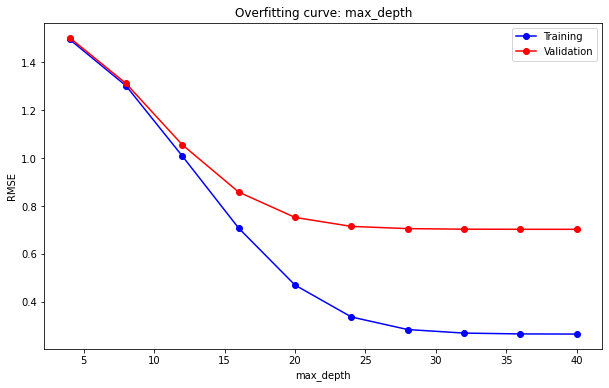

In [135]:
params={'n_estimators':75,'max_depth':0}
losrf_md_m1=train_model(RandomForestRegressor,params,'max_depth',[4,41,4],t_inputs,v_inputs,t_targets,v_targets)

1.1299673194433153 1.1473635488067913

0.9936861439369403 1.0222384832000584

0.908659506771452 0.9494224497861996

0.8481419407452147 0.9030646030425058

0.8016504624897685 0.8712526684664664

0.7627206719376077 0.847156490384044

0.7300796779051727 0.8289424767551394

0.7011002942695828 0.8140390010337404

0.6753757394527213 0.8018849112602321

0.652233899403957 0.7917535274780501

CPU times: user 18min 14s, sys: 642 ms, total: 18min 15s

Wall time: 4min 43s


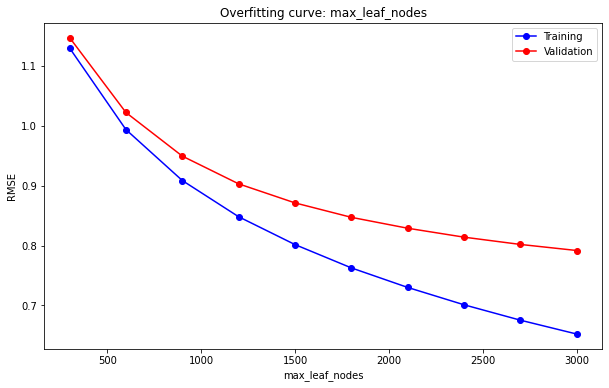

In [138]:
%%time
params={'n_estimators':75,'max_leaf_nodes':0,'max_depth':32}
losrf_mln_m1=train_model(RandomForestRegressor,params,'max_leaf_nodes',[300,3001,300],t_inputs,v_inputs,t_targets,v_targets)

0.652233899403957 0.7917535274780501

0.5884959495082316 0.7679528307073065

0.5387132468628412 0.7518636044917263

0.49857327123470796 0.7410971021264112

CPU times: user 15min 22s, sys: 1.57 s, total: 15min 24s

Wall time: 4min 5s


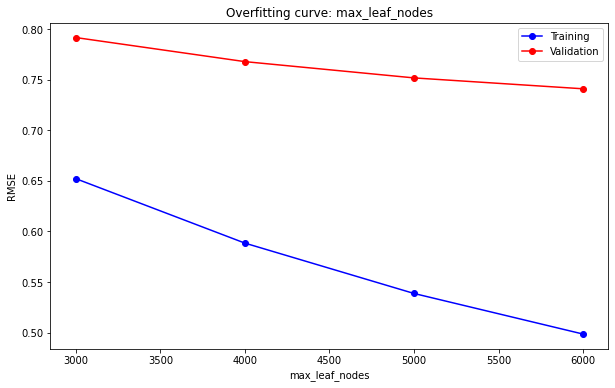

In [37]:
%%time
params={'n_estimators':75,'max_leaf_nodes':0,'max_depth':32}
losrf_mln_m1=train_model(RandomForestRegressor,params,'max_leaf_nodes',[3000,6001,1000],t_inputs,v_inputs,t_targets,v_targets)

0.49857327123470796 0.7410971021264112

0.4655603841508661 0.7328534869240276

0.43825506533122643 0.7270366193387754

0.41554910231515835 0.7224972170883294

0.3962575002800226 0.7189581075758213

CPU times: user 20min 43s, sys: 1.65 s, total: 20min 45s

Wall time: 5min 26s


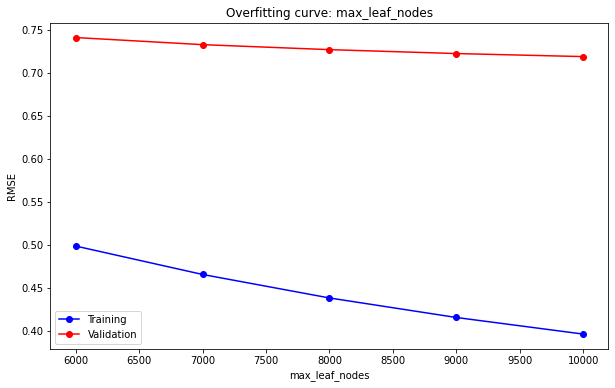

In [39]:
%%time
params={'n_estimators':75,'max_leaf_nodes':0,'max_depth':32}
losrf_mln_m1=train_model(RandomForestRegressor,params,'max_leaf_nodes',[6000,10001,1000],t_inputs,v_inputs,t_targets,v_targets)

1.4059041150580902 1.3994480577492545

1.3551533764146235 1.3512090496733649

1.3265959410302905 1.32492430720979

1.3067712009017594 1.3072911922128219

1.2924336959069007 1.294938875545922

1.2787318753231038 1.2835979474190298

1.2676834771861274 1.2746021046211533

1.258540084116244 1.2675344514476579

1.2504641539822343 1.2615195150555991

1.243012917849611 1.256178040232081

1.2357906656609399 1.2510441777674233


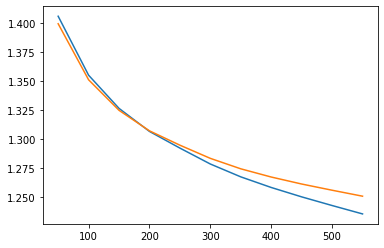

In [81]:
params={'n_estimators':50,'max_features':'sqrt','max_leaf_nodes':5000,'max_depth':32}
train_model(RandomForestRegressor,params,'max_leaf_nodes',[1,552,50],t_inputs,v_inputs,t_targets,v_targets)

So the best parameters for this model are n_estimators =  75    max_depth= 32. We will be creating model with these parameters, fitting the training data and then predicting meter readings for test data

In [39]:
%%time
wbt_df,s1_df=dataset_sample_meter(train1_df,0.06)
df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=RandomForestRegressor(n_jobs=-1,n_estimators=75,max_depth=32,random_state=42)
model.fit(t_inputs,t_targets)
del wbt_df
del s1_df

CPU times: user 2min 58s, sys: 874 ms, total: 2min 59s

Wall time: 48.8 s


In [40]:
%%time
wbt_df=dataset_sample_meter(test1_df,.06,test=True)
test1_df=test1_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test1_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test1_preds

test1_df=pd.merge(test1_df,wbt_df,on='row_id')
del wbt_df
del test1_preds

CPU times: user 3min 25s, sys: 9.84 s, total: 3min 35s

Wall time: 1min 13s


### Training Model for Meter 2

In [52]:
2e5/len(train2_df)

0.08468286057009348

In [ ]:
wbt_df,s2_df=dataset_sample_meter(train2_df,0.1)
df0=s2_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
del wbt_df
del s2_df

0.2265576666318897 0.589286488711486

0.22253924403887132 0.5851012565189206

0.22071781036862134 0.5835332782160497

0.21960720798220817 0.5825208785209739

0.21912985692923323 0.5821196064300883

CPU times: user 23min 56s, sys: 4.8 s, total: 24min 1s

Wall time: 6min 13s


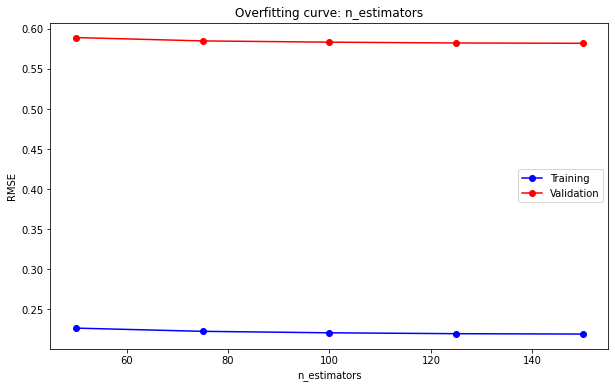

In [61]:
%%time
params={'n_estimators':0}
losrf_ne_m2=train_model(RandomForestRegressor,params,'n_estimators',[50,151,25],t_inputs,v_inputs,t_targets,v_targets)

> n estimators 100 is fine

1.4520681231494321 1.4447334233453129

1.3286794372179709 1.3251017989828382

1.1313510106494677 1.13769483679982

0.8856997506761053 0.9234751758310757

0.6298772580594713 0.7338035903307641

0.4475455295892574 0.6423460504788608

0.3337497648944883 0.6115637339870776

0.27167432172522743 0.6026628786514496

0.2440474657443607 0.600565926923276

0.23376694696044598 0.5999286210386148

CPU times: user 10min 48s, sys: 790 ms, total: 10min 49s

Wall time: 2min 50s


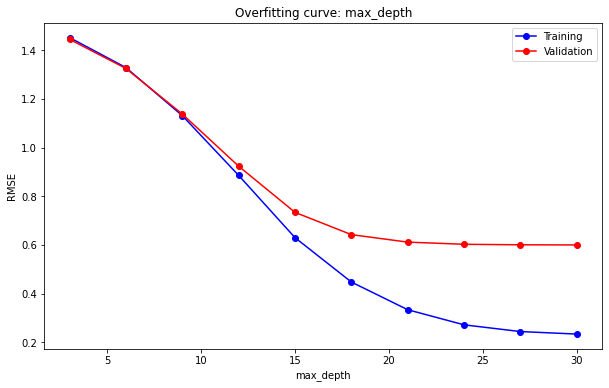

In [113]:
%%time
params={'max_depth':0,'n_estimators':100}
los_md=train_model(RandomForestRegressor,params,'max_depth',[3,31,3],t_inputs,v_inputs,t_targets,v_targets)

> max depth of 25 is fine

1.1683898542873943 1.1692794254151444

1.0391211559973523 1.0434208643829972

0.9544359726677012 0.9617017400939112

0.8917281780123648 0.9020315572738176

0.8462552582207894 0.8602558935738059

0.809703479477112 0.8268318288966774

0.7780171385492447 0.7990463553400035

0.7523210758112675 0.7776591822400877

0.7298154369854927 0.7597744953162354

0.7101414810120954 0.7452862712425367

0.6924856923116474 0.7328630208169297

0.6768675454296298 0.7225744054439286

0.6624517853455977 0.7132390526517016

0.6492178261162808 0.7053238980257687

0.6371353623466107 0.6982889853058806

CPU times: user 16min 33s, sys: 691 ms, total: 16min 33s

Wall time: 4min 21s


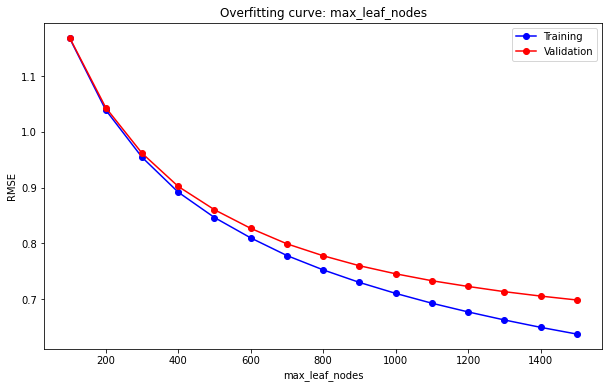

In [124]:
%%time
params={'n_estimators':100,'max_leaf_nodes':0,'max_depth':25}
losrf_mln_m2=train_model(RandomForestRegressor,params,'max_leaf_nodes',[100,1551,100],t_inputs,v_inputs,t_targets,v_targets)

In [41]:
%%time
wbt_df,s2_df=dataset_sample_meter(train2_df,0.1)
df0=s2_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=RandomForestRegressor(n_jobs=-1,n_estimators=100,max_depth=25,random_state=42)
model.fit(t_inputs,t_targets)
del wbt_df
del s2_df

CPU times: user 4min 42s, sys: 893 ms, total: 4min 43s

Wall time: 1min 14s


In [42]:
%%time
wbt_df=dataset_sample_meter(test2_df,.06,test=True)
test2_df=test2_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test2_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test2_preds
test2_df=pd.merge(test2_df,wbt_df,on='row_id')
del wbt_df
del test2_preds

CPU times: user 2min 52s, sys: 6.52 s, total: 2min 58s

Wall time: 57.4 s


### Training Model for Meter 3

In [63]:
wbt_df,s3_df=dataset_sample_meter(train3_df,0.3)
df0=s3_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
del wbt_df,s3_df,df0
gc.collect()

0.24597813690661488 0.653052924122305

0.24218814865180419 0.6510235189457744

0.24021766167355585 0.648604452243841

0.23897054218445235 0.6473266016653038

0.23838728639214174 0.646465596135413

0.23812330439641427 0.6466677779424196

CPU times: user 9min 42s, sys: 1.46 s, total: 9min 43s

Wall time: 2min 32s


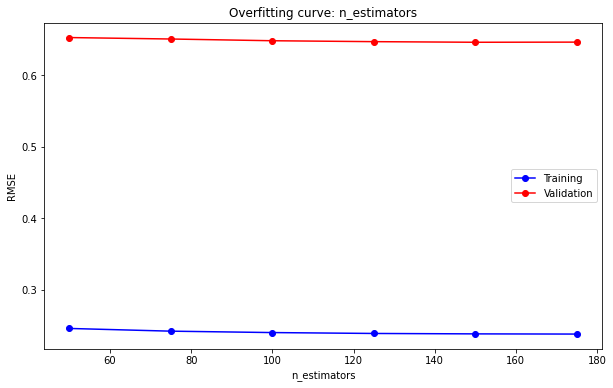

In [64]:
%%time
params={'n_estimators':0}
losrf_ne_m3=train_model(RandomForestRegressor,params,'n_estimators',[50,176,25],t_inputs,v_inputs,t_targets,v_targets)

n_estimators 125

1.47354236879397 1.4833973054365277

1.110335375449702 1.127952412465662

0.7833124990355256 0.8654387571331804

0.5247903550971346 0.7259112361998051

0.35443618695648826 0.6730862358235165

0.27881312792450924 0.6601150086738556

0.2536793172879926 0.6580517199524235

0.24750925098107868 0.6580230561549385

0.24631408344945982 0.6581640955621703

0.24600740956595418 0.6587058086910701

CPU times: user 6min 24s, sys: 931 ms, total: 6min 25s

Wall time: 1min 41s


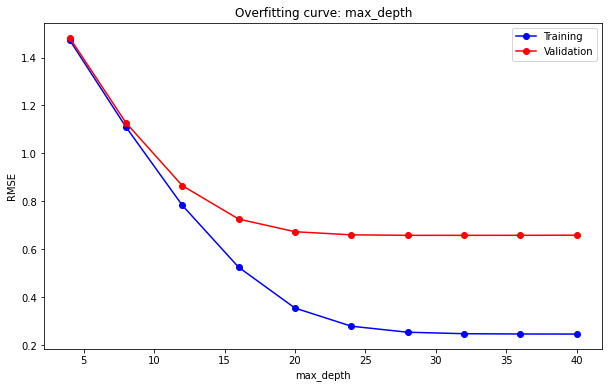

In [126]:
%%time
params={'max_depth':0,'n_estimators':75}
losrf_md_m3=train_model(RandomForestRegressor,params,'max_depth',[4,41,4],t_inputs,v_inputs,t_targets,v_targets)

In [43]:
%%time
wbt_df,s3_df=dataset_sample_meter(train3_df,0.3)
df0=s3_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=RandomForestRegressor(n_jobs=-1,n_estimators=125,random_state=42)
model.fit(t_inputs,t_targets)
del wbt_df
del s2_df

CPU times: user 5min, sys: 683 ms, total: 5min

Wall time: 1min 18s


In [44]:
%%time
wbt_df=dataset_sample_meter(test3_df,.06,test=True)
test3_df=test3_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test1_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test1_preds
test3_df=pd.merge(test3_df,wbt_df,on='row_id')
del wbt_df
del test1_preds

CPU times: user 1min 13s, sys: 1.42 s, total: 1min 15s

Wall time: 24 s


### Training Model for Meter 0

In [103]:
2e5/len(train0_df)

11.517703

In [66]:
wbt_df,s0_df=dataset_sample_meter(train0_df,0.02)
df0=s0_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
del wbt_df,s0_df,df0

0.1485573531780685 0.38790066883339686

0.14580150064057634 0.38517146797147866

0.14465978629982665 0.3841527476767665

0.14381283858051613 0.3830651232352896

CPU times: user 18min 54s, sys: 3.2 s, total: 18min 57s

Wall time: 4min 56s


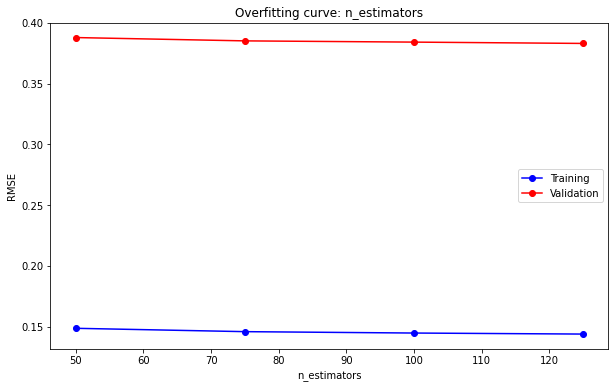

In [67]:
%%time
params={'n_estimators':0}
losrf_ne_m0=train_model(RandomForestRegressor,params,'n_estimators',[50,126,25],t_inputs,v_inputs,t_targets,v_targets)

ne=75

0.6940498222153737 1.0713285307938294

0.5359193117903523 0.9773098203786094

0.47363387018542413 0.9437351641175552

0.4551703527874827 0.9339987478754943

0.45090784742462003 0.9310817537868248

0.4502112924444358 0.931359588393462

0.44997233639075795 0.9310569670523691

CPU times: user 20min, sys: 2.29 s, total: 20min 3s

Wall time: 5min 13s


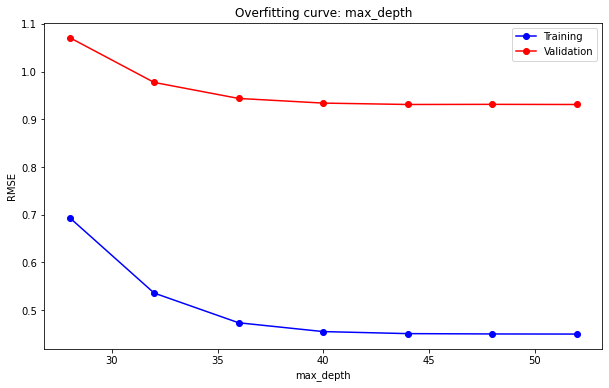

In [54]:
%%time
params={'max_depth':0,'n_estimators':75}
losrf_md_m0=train_model(RandomForestRegressor,params,'max_depth',[28,53,4],t_inputs,v_inputs,t_targets,v_targets)

In [33]:
%%time
wbt_df,s1_df=dataset_sample_meter(train0_df,0.02)
df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=RandomForestRegressor(n_jobs=-1,n_estimators=75,max_depth=40,random_state=42)
model.fit(t_inputs,t_targets)
del wbt_df,s1_df

CPU times: user 3min 29s, sys: 2.18 s, total: 3min 31s

Wall time: 1min 3s


In [34]:
%%time
wbt_df=dataset_sample_meter(test0_df,.06,test=True)
test0_df=test0_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test1_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test1_preds
test0_df=pd.merge(test0_df,wbt_df,on='row_id')
del wbt_df
del test1_preds

CPU times: user 2min 39s, sys: 6.77 s, total: 2min 46s

Wall time: 54.4 s


In [35]:
%%time
wbt_df=dataset_sample_meter(test01_df,.06,test=True)
test01_df=test01_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test01_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test01_preds
test01_df=pd.merge(test01_df,wbt_df,on='row_id')
del wbt_df
del test01_preds

CPU times: user 3min 3s, sys: 12.4 s, total: 3min 15s

Wall time: 1min 2s


In [36]:
%%time
wbt_df=dataset_sample_meter(test02_df,.06,test=True)
test02_df=test02_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test1_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test1_preds
test02_df=pd.merge(test02_df,wbt_df,on='row_id')
del wbt_df
del test1_preds

CPU times: user 2min 37s, sys: 12.3 s, total: 2min 49s

Wall time: 59.8 s


In [37]:
%%time
wbt_df=dataset_sample_meter(test03_df,.06,test=True)
test03_df=test03_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test1_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test1_preds
test03_df=pd.merge(test03_df,wbt_df,on='row_id')
del wbt_df
del test1_preds

CPU times: user 2min 56s, sys: 7.53 s, total: 3min 4s

Wall time: 1min


In [38]:
del test_inputs

**Other Models**

In [45]:
cat_cols.append('building_id')

In [46]:
%%time
wbt_df,s01_df=dataset_sample_meter(train0_df_1,1)
df0=s01_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
#model=RandomForestRegressor(n_jobs=-1,n_estimators=75,random_state=42)
#model.fit(t_inputs,t_targets)
del wbt_df,s01_df,df0

CPU times: user 110 ms, sys: 3.91 ms, total: 114 ms

Wall time: 112 ms


0.30454544218478546 0.716798939345301

0.2868967881418271 0.6903120473930237

0.27564035588282954 0.6823329277869126

0.26835524479134654 0.6737853309516675

0.2624679835409953 0.6688181500073114

0.26055338384236076 0.6658257705447125

0.2597495188111296 0.6690407004825802

0.25766891910767686 0.66921476976057

0.2565287996959724 0.6684369268297875

CPU times: user 29.9 s, sys: 124 ms, total: 30 s

Wall time: 10.1 s


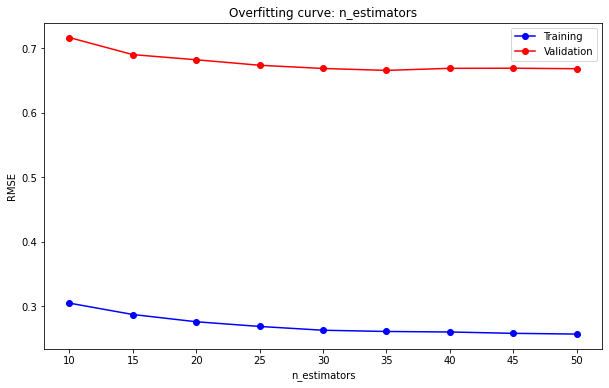

In [48]:
%%time
params={'n_estimators':0}
losrf_ne_m0=train_model(RandomForestRegressor,params,'n_estimators',[10,51,5],t_inputs,v_inputs,t_targets,v_targets)

In [52]:
%%time
wbt_df,s2_df=dataset_sample_meter(train0_df_1,1)
df0=s2_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=RandomForestRegressor(n_jobs=-1,n_estimators=34,max_depth=25,random_state=42)
model.fit(t_inputs,t_targets)
del wbt_df,s2_df,df0

CPU times: user 3.48 s, sys: 10.3 ms, total: 3.49 s

Wall time: 1.01 s


In [53]:
%%time
wbt_df=dataset_sample_meter(test0_df_1,.06,test=True)
test0_df_1=test0_df_1[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test1_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test1_preds
test0_df_1=pd.merge(test0_df_1,wbt_df,on='row_id')
del wbt_df
del test1_preds

CPU times: user 329 ms, sys: 14.1 ms, total: 343 ms

Wall time: 259 ms


In [55]:
wbt_df,s11_df=dataset_sample_meter(train1_df_1,1)
df0=s11_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
del wbt_df,df0,s11_df

0.22152838484969892 0.47501060584611093

0.2113812737056055 0.46192650043441347

0.2039321633635905 0.4567698663565026

0.19451410056507168 0.4521306898915443

0.18935376509174023 0.45068460349172146

0.18761264140629233 0.44953794340716763

0.18646451095976432 0.4473450069830667

0.1834456565956372 0.445856761701558

0.18205679565034097 0.4468742519755927

CPU times: user 30.6 s, sys: 139 ms, total: 30.7 s

Wall time: 10.2 s


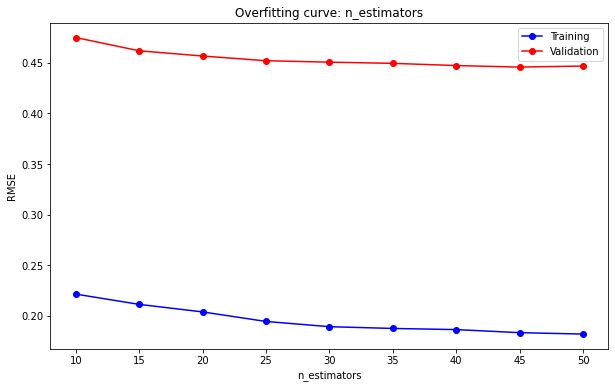

In [58]:
%%time
params={'n_estimators':0}
losrf_ne_m11=train_model(RandomForestRegressor,params,'n_estimators',[10,51,5],t_inputs,v_inputs,t_targets,v_targets)

In [59]:
%%time
wbt_df,s11_df=dataset_sample_meter(train1_df_1,1)
df0=s11_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=RandomForestRegressor(n_jobs=-1,n_estimators=43,random_state=42)
model.fit(t_inputs,t_targets)
del wbt_df,s11_df,df0

CPU times: user 4.66 s, sys: 9.28 ms, total: 4.67 s

Wall time: 1.31 s


In [60]:
%%time
wbt_df=dataset_sample_meter(test1_df_1,.06,test=True)
test1_df_1=test1_df_1[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test1_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test1_preds
test1_df_1=pd.merge(test1_df_1,wbt_df,on='row_id')
del wbt_df
del test1_preds

CPU times: user 574 ms, sys: 9.03 ms, total: 583 ms

Wall time: 387 ms


In [61]:
%%time
wbt_df,s2_df=dataset_sample_meter(train2_df_1,1)
df0=s2_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
del wbt_df,s2_df,df0

CPU times: user 154 ms, sys: 2.06 ms, total: 156 ms

Wall time: 155 ms


0.2565116540845872 0.5325519571587415

0.23799565568991796 0.5200183201964115

0.22939604614629383 0.5122708122920983

0.2237443717991988 0.5119740167569401

0.2194744994148296 0.5108908592143293

0.21640011007454915 0.5164932110241458

0.215235302845303 0.5163359194579582

0.2148473496301678 0.5166322048912355

0.2134184592575603 0.5169621569643341

CPU times: user 1min 12s, sys: 193 ms, total: 1min 12s

Wall time: 21.3 s


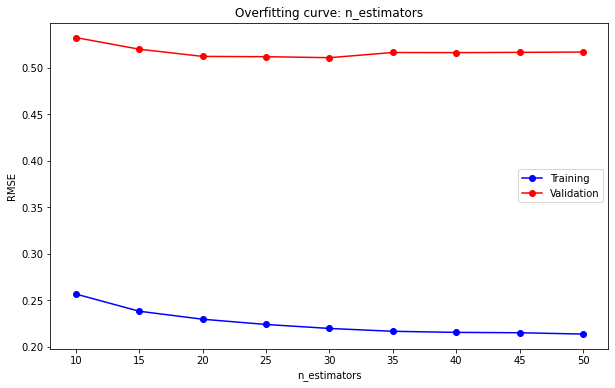

In [62]:
%%time
params={'n_estimators':0}
losrf_ne_m21=train_model(RandomForestRegressor,params,'n_estimators',[10,51,5],t_inputs,v_inputs,t_targets,v_targets)

0.5888078256542731 0.6608782296609431

0.46162406422972446 0.5860387095797008

0.36736854338037356 0.5437745564863166

0.30411862310993504 0.5283107578146201

0.26747829831833686 0.5187518631736707

0.24510373518795273 0.5145955504175938

0.23210186226254384 0.5129392206157678

0.226248929441736 0.5134468464140672

0.22189145550718672 0.5126399066831676

0.22098249545096674 0.5140371617304903

0.2206361200414814 0.515376057682121

CPU times: user 1min 12s, sys: 194 ms, total: 1min 12s

Wall time: 21.4 s


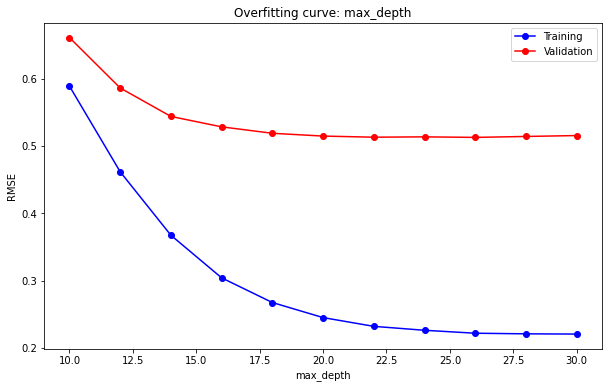

In [63]:
%%time
params={'n_estimators':30}
losrf_ne_m21=train_model(RandomForestRegressor,params,'max_depth',[10,31,2],t_inputs,v_inputs,t_targets,v_targets)

In [79]:
%%time
wbt_df,s2_df=dataset_sample_meter(train2_df_1,1)
df0=s2_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=RandomForestRegressor(n_jobs=-1,n_estimators=27,max_depth=22,random_state=42)
model.fit(t_inputs,t_targets)
del wbt_df,s2_df,df0

CPU times: user 6.72 s, sys: 20.4 ms, total: 6.74 s

Wall time: 1.97 s


In [80]:
%%time
wbt_df=dataset_sample_meter(test2_df_1,.06,test=True)
test2_df_1=test2_df_1[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test2_1preds=model.predict(test_inputs)
wbt_df['meter_reading']=test2_1preds
test2_df_1=pd.merge(test2_df_1,wbt_df,on='row_id')
del wbt_df
del test2_1preds

CPU times: user 585 ms, sys: 14 ms, total: 599 ms

Wall time: 417 ms


In [67]:
wbt_df,s31_df=dataset_sample_meter(train3_df_1,1)
df0=s31_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)

0.5656871057341707 1.3438405221742327

0.539816608480305 1.3143706494070808

0.5224575969881923 1.3048845257468715

0.51223584645085 1.2974917506080406

0.5063655881275438 1.297148862232456

0.5001513081271535 1.2953056985702482

0.4972666404847315 1.2920319740812212

0.4957154168740536 1.290552087610631

0.49354409649768854 1.288792996055363

0.4911845254797369 1.2869625415923276

0.48958598481745186 1.2883669559690596

0.4887363671890173 1.2865693437929608

0.48713947465086677 1.288243145726074

CPU times: user 2min 26s, sys: 392 ms, total: 2min 27s

Wall time: 41.4 s


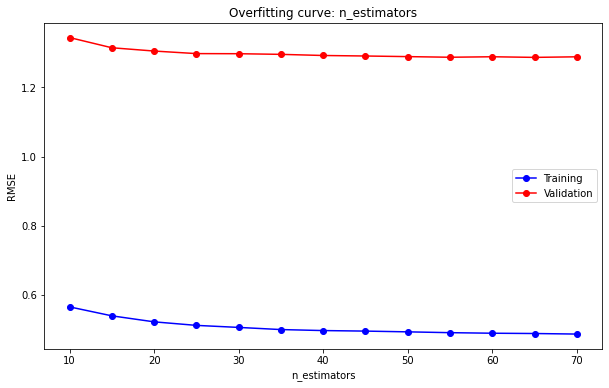

In [69]:
%%time
params={'n_estimators':0}
losrf_ne_m31=train_model(RandomForestRegressor,params,'n_estimators',[10,71,5],t_inputs,v_inputs,t_targets,v_targets)

0.516874938507307 1.293437261746838

0.5069764278420915 1.2937996993850363

0.500959651896575 1.2903000651666208

0.49786506666789937 1.2941923544966727

0.49639773249065533 1.2910017410213952

0.49528249080149545 1.292302001774518

CPU times: user 1min 13s, sys: 200 ms, total: 1min 13s

Wall time: 20.8 s


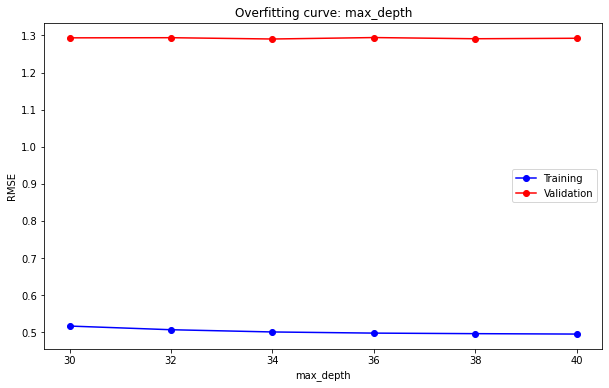

In [72]:
%%time
params={'n_estimators':45}
losrf_ne_m31=train_model(RandomForestRegressor,params,'max_depth',[30,41,2],t_inputs,v_inputs,t_targets,v_targets)

In [73]:
%%time
wbt_df,s2_df=dataset_sample_meter(train3_df_1,1)
df0=s2_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=RandomForestRegressor(n_jobs=-1,n_estimators=43,max_depth=33,random_state=42)
model.fit(t_inputs,t_targets)
del wbt_df,s2_df,df0

CPU times: user 11.2 s, sys: 13.3 ms, total: 11.2 s

Wall time: 3.07 s


In [74]:
%%time
wbt_df=dataset_sample_meter(test3_df_1,.06,test=True)
test3_df_1=test3_df_1[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test1_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test1_preds
test3_df_1=pd.merge(test3_df_1,wbt_df,on='row_id')
del wbt_df
del test1_preds

CPU times: user 1.06 s, sys: 6.13 ms, total: 1.07 s

Wall time: 577 ms


0.3060632405108078 0.6763003325991437

0.30166728920597746 0.6708682144984048

0.29935996624354627 0.6688687303448225

0.297569902201876 0.6671033901911956

0.29601659893044 0.6655362503821576

0.29563069450019164 0.6666039436415809

0.29478040253044957 0.6661010121153527

0.29356618802089396 0.6630128354798343

0.2927903690047218 0.661819405259746


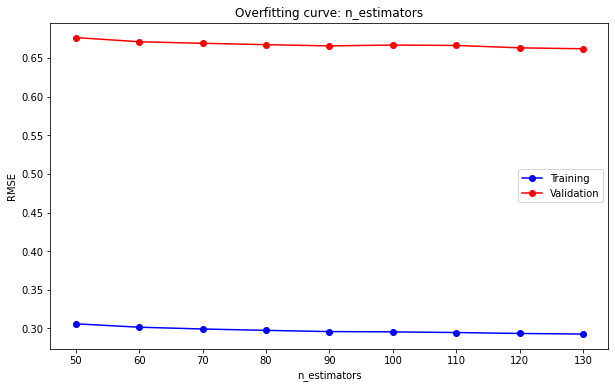

In [98]:
wbt_df,s22_df=dataset_sample_meter(train2_df_2,1)
df0=s22_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0}
losrf_ne_m22=train_model(RandomForestRegressor,params,'n_estimators',[50,131,10],t_inputs,v_inputs,t_targets,v_targets)

0.9472707231183143 2.3979067976844015

0.9263983543641401 2.3726826580641838

0.9120859891454242 2.362160831246293

0.9057033944674648 2.353323152368982

0.9030725965487034 2.3492902499700667

0.8985971734945578 2.3445454216595905

0.8946342867864359 2.3420153521151126

0.8934392775012868 2.3409398297737525

0.8918206364158026 2.343622539234054

0.8901242800142339 2.3434894614287365

0.8887947529607222 2.3457048224412302


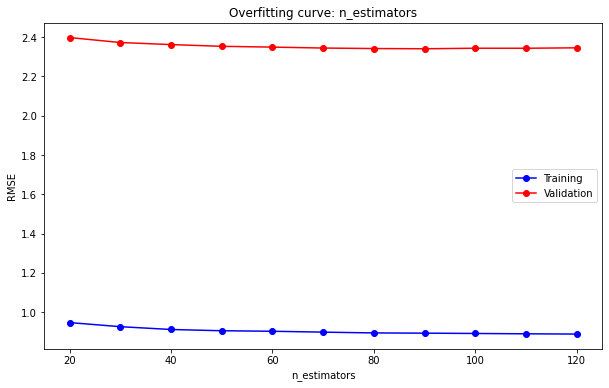

In [102]:
wbt_df,s11_df=dataset_sample_meter(train1_df_1,1)
df0=s11_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0}
losrf_ne_m31=train_model(RandomForestRegressor,params,'n_estimators',[20,121,10],t_inputs,v_inputs,t_targets,v_targets)

0.6245790819818805 1.531345497385859

0.6034466280847653 1.5166601417492982

0.5939614905593006 1.5139610371474295

0.5884112852627769 1.5125482539881105

0.5847637161607472 1.5087493788016195

0.5810233650328349 1.5054869595575817

0.5786860353155568 1.5051046984312841

0.5762163307776029 1.503019786139687

0.5751363182447923 1.502704003204702

0.5735284856799049 1.5025005496284076

0.5722238751753943 1.5024183589372935


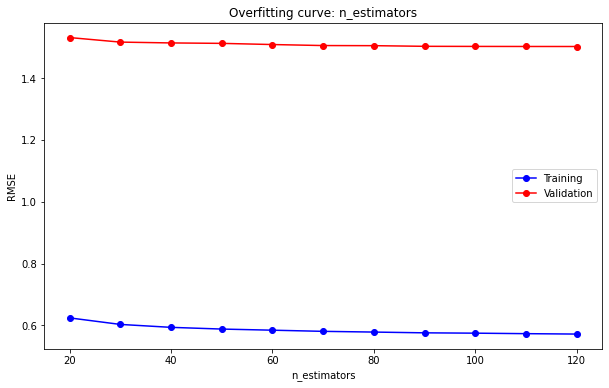

In [103]:
wbt_df,s32_df=dataset_sample_meter(train3_df_2,1)
df0=s32_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0}
losrf_ne_m32=train_model(RandomForestRegressor,params,'n_estimators',[20,121,10],t_inputs,v_inputs,t_targets,v_targets)

In [120]:
test_df=pd.read_csv('/kaggle/input/ashrae-energy-prediction/test.csv',dtype=training_dtypes)

In [121]:
test_df=test_df[['row_id']]
test_df['meter_reading']=0

In [122]:
test_df.set_index('row_id',inplace=True)

In [125]:
#test0_df.set_index('row_id',inplace=True)
test0_df_1.set_index('row_id',inplace=True)
test01_df.set_index('row_id',inplace=True)
test02_df.set_index('row_id',inplace=True)
test03_df.set_index('row_id',inplace=True)

test1_df.set_index('row_id',inplace=True)
test1_df_1.set_index('row_id',inplace=True)

test2_df.set_index('row_id',inplace=True)
test2_df_1.set_index('row_id',inplace=True)

test3_df.set_index('row_id',inplace=True)
test3_df_1.set_index('row_id',inplace=True)

In [ ]:
allparts=[test0_df,test01_df,test02_df,test03_df,test0_df_1,test0_df_2,
         test1_df,test1_df_1,
         test2_df,test2_df_1,
         test3_df,test3_df_1,]
submission_df=pd.concat(allparts)

In [128]:
submission_df.sort_values(by='row_id',inplace=True)
submission_df.reset_index(drop=True)
submission_df.meter_reading=np.expm1(submission_df.meter_reading)

In [131]:
len(submission_df)

41697600

In [151]:
%%time
submission_df.to_csv('rf_meter_wise_submission1.csv',index=None)

CPU times: user 1min 22s, sys: 3.15 s, total: 1min 25s

Wall time: 1min 25s


Submission Score:-<br>
![](https://i.imgur.com/GsJGCp0.png)

## XGBoost Regressor

In [38]:
num_cols=['square_feet', 'air_temperature','dew_temperature',
       'cloud_coverage', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_speed']
cat_cols=['primary_use','month','weekday','hour']
target_col='meter_reading'

0.79779154 0.82768

0.66136485 0.71786463

0.59761906 0.67739886

0.5563544 0.65449095

0.52578837 0.64138144


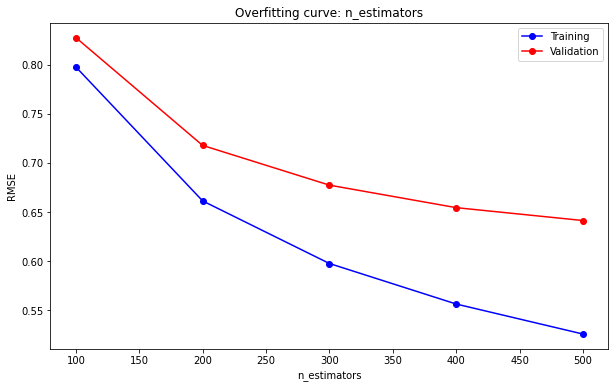

In [37]:
wbt_df,s1_df=dataset_sample_meter(train1_df,.07)
df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0,'objective':'reg:squarederror'}
losrf_ne_m1=train_model(XGBRegressor,params,'n_estimators',[100,501,100],t_inputs,v_inputs,t_targets,v_targets)
del s1_df,df0,wbt_df

There negligible difference in losses. Let's try adding site_id in cat_cols and building_id in num cols as one hot encoding building id will take lots of space and may get us out of RAM.

In [55]:
num_cols=['square_feet', 'air_temperature','dew_temperature',
       'cloud_coverage', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_speed','building_id']
cat_cols=['primary_use','month','weekday','hour','site_id']
target_col='meter_reading'

0.5910463 0.6437076

0.5390366 0.61595947

0.5072133 0.6030479

0.47723392 0.5914955

0.455296 0.58498996

0.43504298 0.57950175

0.41835082 0.57583225

0.40242338 0.5719851

CPU times: user 1h 27min 45s, sys: 7.58 s, total: 1h 27min 53s

Wall time: 22min 33s


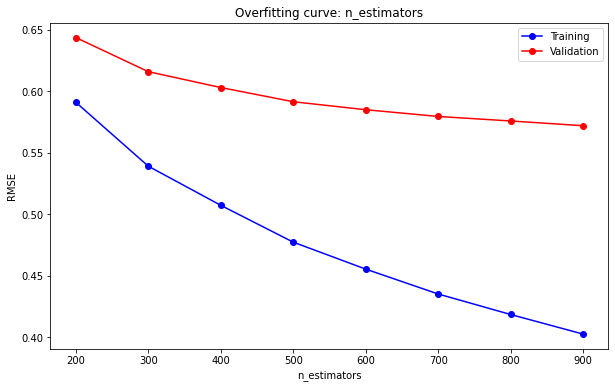

In [47]:
%%time
wbt_df,s1_df=dataset_sample_meter(train1_df,.07)
df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0,'objective':'reg:squarederror'}
losxb_ne_m1=train_model(XGBRegressor,params,'n_estimators',[200,901,100],t_inputs,v_inputs,t_targets,v_targets)
del s1_df,df0,wbt_df

We  got best results with latest modifications.
No overfitting is happening till 900. We will not go ahead due to yime constraints

For 0.05:  0.6329334 0.6716504

For 0.1:  0.5391057 0.61292434

For 0.15000000000000002:  0.4899756 0.59115285


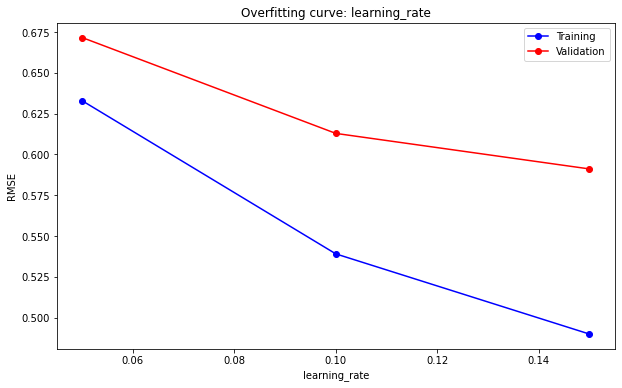

In [59]:
%%time
params={'n_estimators':900,'objective':'reg:squarederror','learning_rate':0}
losxgb_lr_m1=train_model(XGBRegressor,params,'learning_rate',[.05,0.16,.05],t_inputs,v_inputs,t_targets,v_targets)
#del s1_df,df0,wbt_df

For 0.25:  0.42769992 0.57490337

For 0.3:  0.40242338 0.5719851

For 0.35:  0.3837365 0.5761658

CPU times: user 55min 36s, sys: 5.2 s, total: 55min 41s

Wall time: 14min 19s


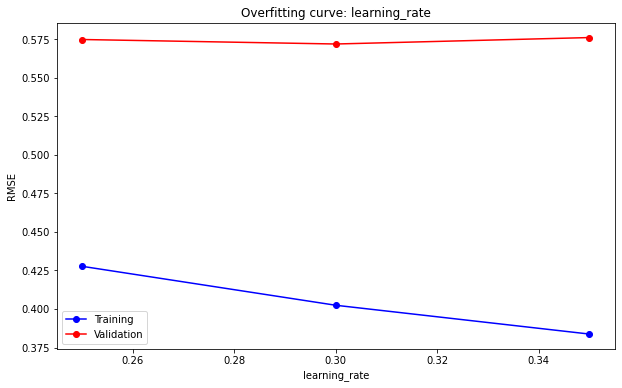

In [38]:
%%time
wbt_df,s1_df=dataset_sample_meter(train1_df,.07)
df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':900,'objective':'reg:squarederror','learning_rate':0}
losxgb_lr_m1=train_model(XGBRegressor,params,'learning_rate',[.25,0.36,.05],t_inputs,v_inputs,t_targets,v_targets)
del s1_df,df0,wbt_df

For 5:  0.6177421 0.6558573

For 7:  0.4630655 0.5813651

For 9:  0.30469096 0.54753214


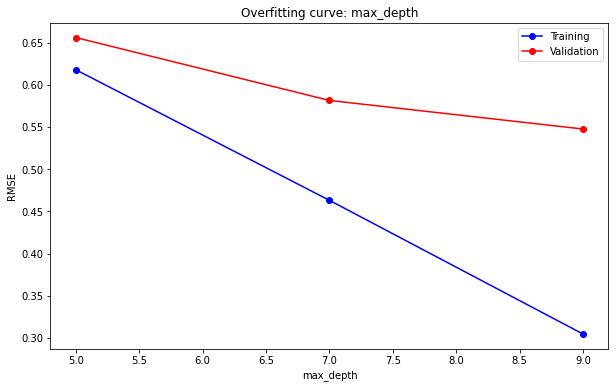

In [60]:
params={'n_estimators':900,'objective':'reg:squarederror','learning_rate':0.1,'max_depth':0}
losxgb_md_m1=train_model(XGBRegressor,params,'max_depth',[5,10,2],t_inputs,v_inputs,t_targets,v_targets)

For 5:  0.49508238 0.5928412

For 7:  0.30441782 0.5603016

For 9:  0.13549793 0.56026167

For 11:  0.034309264 0.56187654

For 13:  0.01285426 0.56979936

CPU times: user 2h 30min 10s, sys: 22.1 s, total: 2h 30min 32s

Wall time: 38min 25s


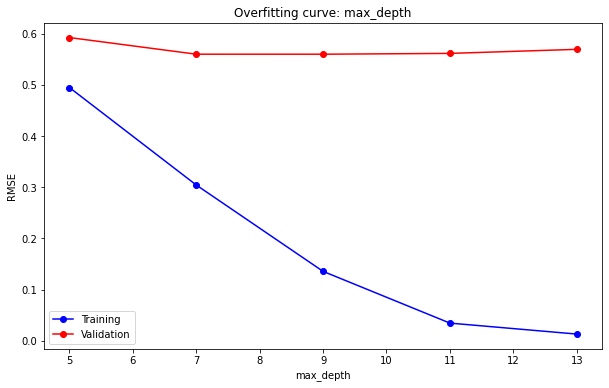

In [42]:
%%time
wbt_df,s1_df=dataset_sample_meter(train1_df,.07)
df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':900,'objective':'reg:squarederror','learning_rate':0.3,'max_depth':0}
losxgb_md_m1=train_model(XGBRegressor,params,'max_depth',[5,14,2],t_inputs,v_inputs,t_targets,v_targets)
del s1_df,df0,wbt_df


In [56]:
params={'n_estimators':900,'objective':'reg:squarederror','learning_rate':.15,'max_depth':11}

In [57]:
%%time
wbt_df,s1_df=dataset_sample_meter(train1_df,.07)
df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=XGBRegressor(n_jobs=-1,random_state=42,**params)
model.fit(t_inputs,t_targets)
del wbt_df,s1_df,df0

CPU times: user 29min 13s, sys: 2.84 s, total: 29min 16s

Wall time: 7min 29s


In [58]:
%%time
wbt_df=dataset_sample_meter(test1_df,.06,test=True)
test1_df=test1_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test1_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test1_preds

test1_df=pd.merge(test1_df,wbt_df,on='row_id')
del wbt_df
del test1_preds

CPU times: user 13min 9s, sys: 7.46 s, total: 13min 16s

Wall time: 3min 46s


### Training for Meter 2

For 200:  0.5139171 0.5861827

For 300:  0.47599554 0.5727643

For 400:  0.45171615 0.5669678

For 500:  0.4299549 0.5629073

For 600:  0.41164052 0.55971926

For 700:  0.39535162 0.55821884

For 800:  0.38114673 0.55692333

For 900:  0.36758316 0.5556757


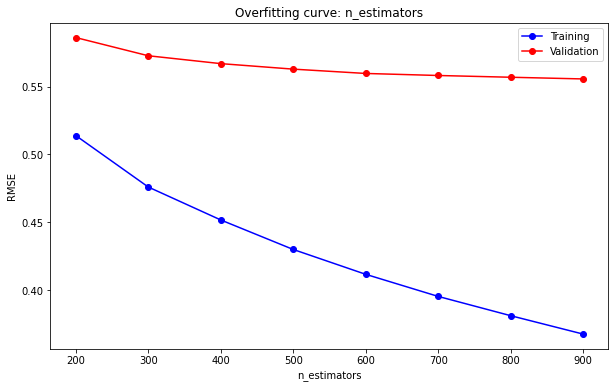

In [61]:
wbt_df,s1_df=dataset_sample_meter(train2_df,.1)
df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0,'objective':'reg:squarederror'}
#losxgb_md_m1=train_model(XGBRegressor,params,'max_depth',[5,11,2],t_inputs,v_inputs,t_targets,v_targets)
losxgb_ne_m2=train_model(XGBRegressor,params,'n_estimators',[200,901,100],t_inputs,v_inputs,t_targets,v_targets)
del s1_df,df0,wbt_df

For 0.1:  0.48475078 0.5669475

For 0.15000000000000002:  0.44923553 0.55948675

For 0.2:  0.4217415 0.55487514

For 0.25:  0.40386438 0.55515516

CPU times: user 45min 49s, sys: 2.08 s, total: 45min 51s

Wall time: 11min 40s


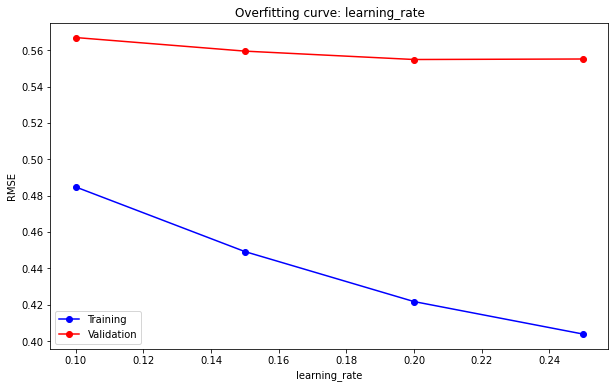

In [40]:
%%time
wbt_df,s1_df=dataset_sample_meter(train2_df,.1)
df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':800,'objective':'reg:squarederror','learning_rate':0}
losxgb_lr_m2=train_model(XGBRegressor,params,'learning_rate',[.1,.26,.05],t_inputs,v_inputs,t_targets,v_targets)
del s1_df,df0,wbt_df

For 0.15:  0.43903562 0.5569467

For 0.2:  0.4075329 0.5524072

For 0.25:  0.39040163 0.5538785

CPU times: user 49min 16s, sys: 4.4 s, total: 49min 20s

Wall time: 12min 36s


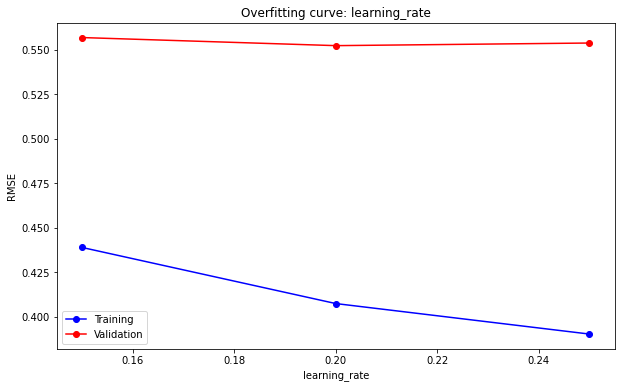

In [43]:
%%time
wbt_df,s2_df=dataset_sample_meter(train2_df,.1)
df0=s2_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':900,'objective':'reg:squarederror','learning_rate':0}
losxgb_lr_m2=train_model(XGBRegressor,params,'learning_rate',[.15,.26,.05],t_inputs,v_inputs,t_targets,v_targets)
del s2_df,df0,wbt_df

In [162]:
%%time
wbt_df,s2_df=dataset_sample_meter(train2_df,.1)
df0=s2_df.copy()

CPU times: user 2.29 s, sys: 222 ms, total: 2.52 s

Wall time: 2.52 s


In [59]:
params={'n_estimators':900,'objective':'reg:squarederror','learning_rate':.1,'max_depth':10}

In [60]:
%%time
wbt_df,s2_df=dataset_sample_meter(train2_df,.1)
df0=s2_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=XGBRegressor(n_jobs=-1,random_state=42,**params)
model.fit(t_inputs,t_targets)
del wbt_df,s2_df,df0

CPU times: user 24min 9s, sys: 2.15 s, total: 24min 11s

Wall time: 6min 11s


In [61]:
%%time
wbt_df=dataset_sample_meter(test2_df,.06,test=True)
test2_df=test2_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test2_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test2_preds

test2_df=pd.merge(test2_df,wbt_df,on='row_id')
del wbt_df
del test2_preds

CPU times: user 7min 21s, sys: 3.59 s, total: 7min 25s

Wall time: 2min 5s


### Training for Meter 3

For 200:  0.55496114 0.61524767

For 300:  0.52179873 0.60085297

For 400:  0.49595007 0.591116

For 500:  0.47668862 0.585199

For 600:  0.4582318 0.5800917

For 700:  0.44535252 0.5777168

For 800:  0.4312955 0.57508653

For 900:  0.41924882 0.5735727


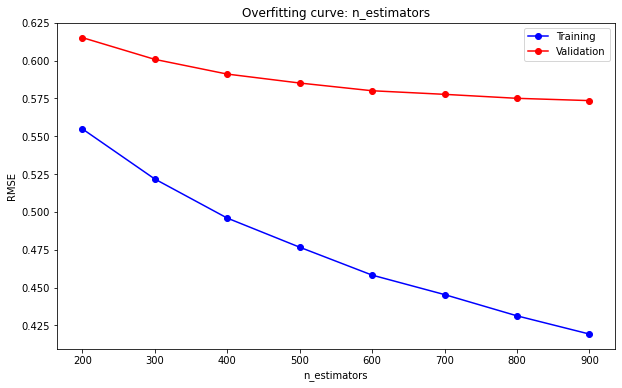

In [62]:
wbt_df,s3_df=dataset_sample_meter(train3_df,.35)
df0=s3_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0,'objective':'reg:squarederror'}
#losxgb_md_m1=train_model(XGBRegressor,params,'max_depth',[5,11,2],t_inputs,v_inputs,t_targets,v_targets)
losxgb_ne_m3=train_model(XGBRegressor,params,'n_estimators',[200,901,100],t_inputs,v_inputs,t_targets,v_targets)
del s3_df,df0,wbt_df

For 0.1:  0.5216652 0.5937934

For 0.15000000000000002:  0.48529568 0.58356315

For 0.2:  0.45659915 0.57528317

For 0.25:  0.43779957 0.5750379


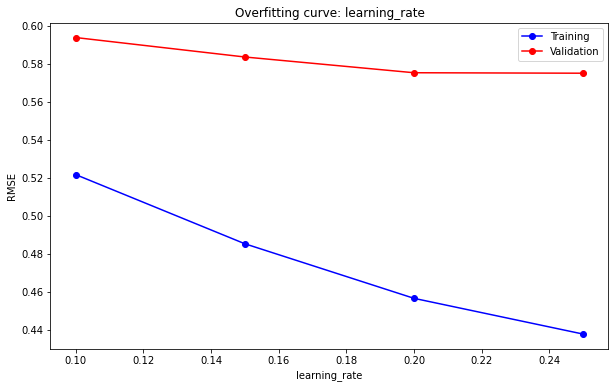

In [41]:
wbt_df,s3_df=dataset_sample_meter(train3_df,.35)
df0=s3_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':900,'objective':'reg:squarederror'}
#losxgb_md_m1=train_model(XGBRegressor,params,'max_depth',[5,11,2],t_inputs,v_inputs,t_targets,v_targets)
losxgb_lr_m3=train_model(XGBRegressor,params,'learning_rate',[.1,.26,.05],t_inputs,v_inputs,t_targets,v_targets)
del s3_df,df0,wbt_df

For 0.3:  0.41924882 0.5735727

For 0.35:  0.4067482 0.5762797


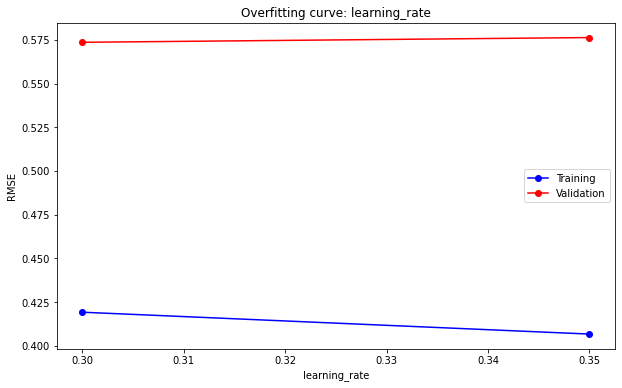

In [40]:
wbt_df,s3_df=dataset_sample_meter(train3_df,.35)
df0=s3_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':900,'objective':'reg:squarederror'}
#losxgb_md_m1=train_model(XGBRegressor,params,'max_depth',[5,11,2],t_inputs,v_inputs,t_targets,v_targets)
losxgb_lr_m3=train_model(XGBRegressor,params,'learning_rate',[.3,.36,.05],t_inputs,v_inputs,t_targets,v_targets)
del s3_df,df0,wbt_df

For 5:  0.499168 0.5919511

For 7:  0.33277315 0.5664164

For 9:  0.16278923 0.5601251

For 11:  0.049657557 0.5633149

For 13:  0.017863456 0.5607854


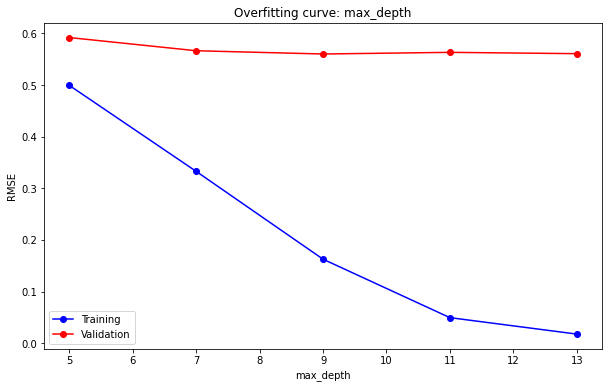

In [43]:
wbt_df,s3_df=dataset_sample_meter(train3_df,.35)
df0=s3_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':900,'objective':'reg:squarederror','max_depth':0}
losxgb_md_m3=train_model(XGBRegressor,params,'max_depth',[5,14,2],t_inputs,v_inputs,t_targets,v_targets)
#losxgb_lr_m3=train_model(XGBRegressor,params,'learning_rate',[.1,.26,.05],t_inputs,v_inputs,t_targets,v_targets)
del s3_df,df0,wbt_df

For 9:  0.25933582 0.5491774

For 11:  0.13145104 0.54639924


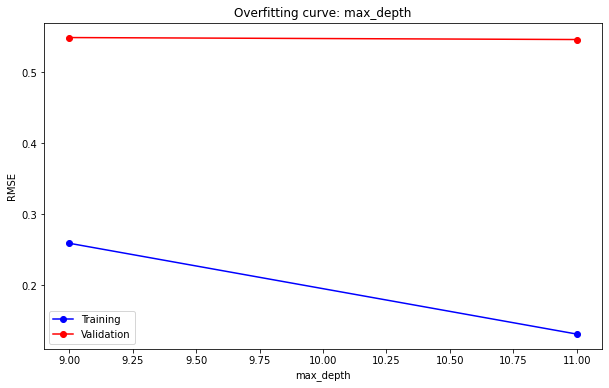

In [45]:
wbt_df,s3_df=dataset_sample_meter(train3_df,.35)
df0=s3_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':900,'objective':'reg:squarederror','max_depth':0,'learning_rate':.15}
losxgb_md_m3=train_model(XGBRegressor,params,'max_depth',[9,12,2],t_inputs,v_inputs,t_targets,v_targets)
#losxgb_lr_m3=train_model(XGBRegressor,params,'learning_rate',[.1,.26,.05],t_inputs,v_inputs,t_targets,v_targets)
del s3_df,df0,wbt_df

In [62]:
params={'n_estimators':900,'objective':'reg:squarederror','learning_rate':.15,'max_depth':11}

In [63]:
%%time
wbt_df,s3_df=dataset_sample_meter(train3_df,.35)
df0=s3_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=XGBRegressor(n_jobs=-1,random_state=42,**params)
model.fit(t_inputs,t_targets)
del wbt_df,s3_df,df0

CPU times: user 33min 14s, sys: 3.56 s, total: 33min 18s

Wall time: 8min 31s


In [64]:
%%time
wbt_df=dataset_sample_meter(test3_df,.06,test=True)
test3_df=test3_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test3_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test3_preds

test3_df=pd.merge(test3_df,wbt_df,on='row_id')
del wbt_df
del test3_preds

CPU times: user 3min 57s, sys: 1.81 s, total: 3min 58s

Wall time: 1min 5s


### Training for Meter 0

For 200:  0.35728246 0.38161385

For 300:  0.31701145 0.34969595

For 400:  0.29441103 0.33598846

For 500:  0.27938986 0.32853624

For 600:  0.26642308 0.32340127

For 700:  0.25607747 0.31980368

For 800:  0.2459579 0.3162632

For 900:  0.23701845 0.31350937

CPU times: user 2h 8min 39s, sys: 13.3 s, total: 2h 8min 53s

Wall time: 33min 12s


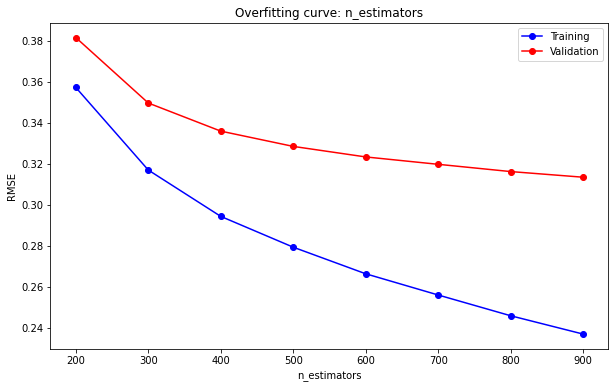

In [63]:
%%time
wbt_df,s0_df=dataset_sample_meter(train0_df,.03)
df0=s0_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0,'objective':'reg:squarederror'}
losxgb_ne_m2=train_model(XGBRegressor,params,'n_estimators',[200,901,100],t_inputs,v_inputs,t_targets,v_targets)
del s0_df,df0,wbt_df

For 1000:  0.229389 0.31171814

For 1100:  0.22163941 0.30973223

CPU times: user 1h 4min 49s, sys: 8.53 s, total: 1h 4min 58s

Wall time: 16min 46s


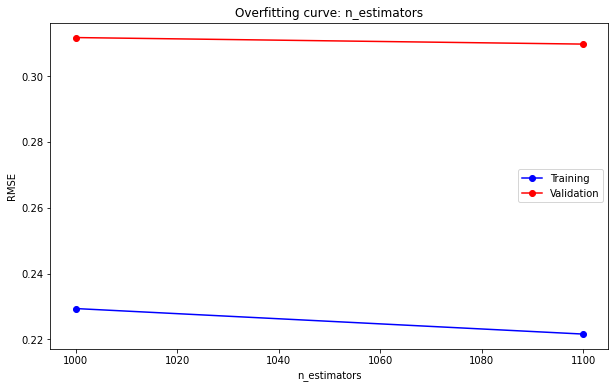

In [41]:
%%time
wbt_df,s0_df=dataset_sample_meter(train0_df,.03)
df0=s0_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0,'objective':'reg:squarederror'}
losxgb_ne_m0=train_model(XGBRegressor,params,'n_estimators',[1000,1101,100],t_inputs,v_inputs,t_targets,v_targets)
del s0_df,df0,wbt_df

For 0.2:  0.24984172 0.3158683

For 0.265:  0.23176688 0.31129652

For 0.33:  0.21598226 0.31042716

CPU times: user 1h 43min 5s, sys: 12.2 s, total: 1h 43min 17s

Wall time: 26min 32s


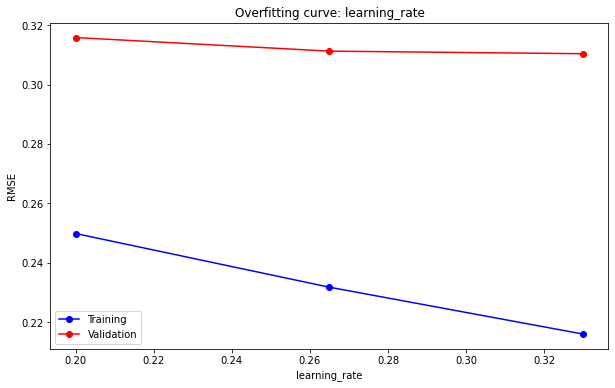

In [44]:
%%time
wbt_df,s0_df=dataset_sample_meter(train0_df,.03)
df0=s0_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':1100,'objective':'reg:squarederror','learning_rate':0}
losxgb_lr_m0=train_model(XGBRegressor,params,'learning_rate',[.2,.35,.065],t_inputs,v_inputs,t_targets,v_targets)
del s0_df,df0,wbt_df

For 8:  0.17741 0.29951692

For 10:  0.09888383 0.2938822

For 12:  0.04045008 0.29127178


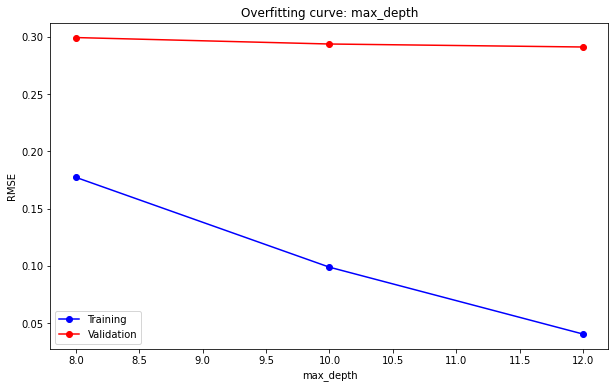

In [47]:
wbt_df,s0_df=dataset_sample_meter(train0_df,.03)
df0=s0_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':1100,'objective':'reg:squarederror','learning_rate':.17}
losxgb_md_m0=train_model(XGBRegressor,params,'max_depth',[8,13,2],t_inputs,v_inputs,t_targets,v_targets)
del s0_df,df0,wbt_df

In [65]:
params={'n_estimators':1100,'objective':'reg:squarederror','learning_rate':.17,'max_depth':11}

In [66]:
%%time
wbt_df,s0_df=dataset_sample_meter(train0_df,.03)
df0=s0_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=XGBRegressor(n_jobs=-1,random_state=42,**params)
model.fit(t_inputs,t_targets)
del wbt_df,s0_df,df0

CPU times: user 52min 22s, sys: 5.83 s, total: 52min 28s

Wall time: 13min 30s


In [67]:
%%time
wbt_df=dataset_sample_meter(test0_df,.06,test=True)
test0_df=test0_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test0_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test0_preds

test0_df=pd.merge(test0_df,wbt_df,on='row_id')
del wbt_df
del test0_preds

CPU times: user 12min 18s, sys: 5.34 s, total: 12min 23s

Wall time: 3min 23s


In [68]:
%%time
wbt_df=dataset_sample_meter(test01_df,.06,test=True)
test01_df=test01_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test01_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test01_preds

test01_df=pd.merge(test01_df,wbt_df,on='row_id')
del wbt_df
del test01_preds

CPU times: user 12min 28s, sys: 5.27 s, total: 12min 33s

Wall time: 3min 27s


In [69]:
%%time
wbt_df=dataset_sample_meter(test02_df,.06,test=True)
test02_df=test02_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test02_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test02_preds

test02_df=pd.merge(test02_df,wbt_df,on='row_id')
del wbt_df
del test02_preds

CPU times: user 12min 21s, sys: 5.42 s, total: 12min 26s

Wall time: 3min 24s


In [70]:
%%time
wbt_df=dataset_sample_meter(test03_df,.06,test=True)
test03_df=test03_df[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test03_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test03_preds

test03_df=pd.merge(test03_df,wbt_df,on='row_id')
del wbt_df
del test03_preds

CPU times: user 12min 28s, sys: 4.79 s, total: 12min 33s

Wall time: 3min 26s


### Training sub models

In [38]:
num_cols=['square_feet', 'air_temperature','dew_temperature',
       'cloud_coverage', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_speed']
cat_cols=['primary_use','month','weekday','hour','building_id','site_id']
target_col='meter_reading'

For 100:  0.30161852 0.53021556

For 200:  0.20343168 0.50398004

For 300:  0.15258704 0.49767354

For 400:  0.120702036 0.49425414

For 500:  0.096769035 0.49198723


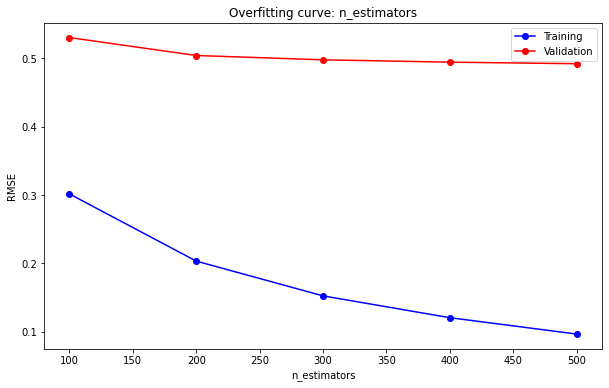

In [34]:
wbt_df,s11_df=dataset_sample_meter(train1_df_1,1)
df0=s11_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0}
losrf_ne_m1=train_model(XGBRegressor,params,'n_estimators',[100,501,100],t_inputs,v_inputs,t_targets,v_targets)
del s11_df,df0,wbt_df

For 0.05:  0.36646745 0.5495042

For 0.1:  0.26620147 0.5092727

For 0.15000000000000002:  0.209763 0.48847246

For 0.2:  0.17142136 0.47368884

For 0.25:  0.14137594 0.48383754

CPU times: user 2min 49s, sys: 662 ms, total: 2min 49s

Wall time: 43.5 s


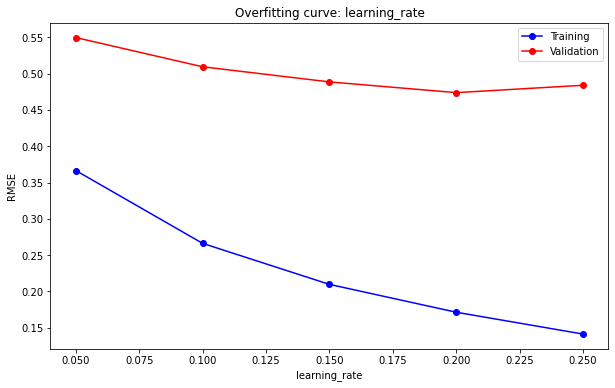

In [35]:
%%time
wbt_df,s11_df=dataset_sample_meter(train1_df_1,1)
df0=s11_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':400,'learning_rate':.1}
losxgb_lr_m11=train_model(XGBRegressor,params,'learning_rate',[.05,.26,.05],t_inputs,v_inputs,t_targets,v_targets)
del s11_df,df0,wbt_df

For 6:  0.2793326 0.5157058

For 8:  0.13524775 0.44687498

For 10:  0.054559834 0.4162345

For 12:  0.016462266 0.4297833

CPU times: user 3min 29s, sys: 2.17 s, total: 3min 31s

Wall time: 54 s


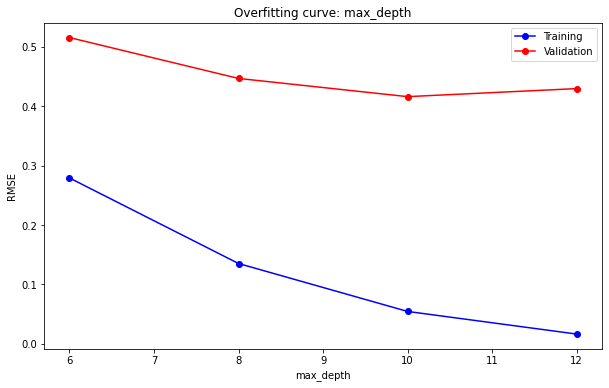

In [40]:
%%time
wbt_df,s11_df=dataset_sample_meter(train1_df_1,1)
df0=s11_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':400,'learning_rate':.1,'max_depth':0}
losrf_md_m11=train_model(XGBRegressor,params,'max_depth',[6,13,2],t_inputs,v_inputs,t_targets,v_targets)
#both site id and building id in num_cols and site_id only in cat_cols
del s11_df,df0,wbt_df

In [40]:
%%time
wbt_df,s11_df=dataset_sample_meter(train1_df_1,1)
df0=s11_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=XGBRegressor(n_jobs=-1,n_estimators=400,max_depth=10,random_state=42,learning_rate=.1,objective='reg:squarederror')
model.fit(t_inputs,t_targets)
del wbt_df,s11_df,df0

CPU times: user 48.7 s, sys: 273 ms, total: 49 s

Wall time: 12.5 s


In [41]:
%%time
wbt_df=dataset_sample_meter(test1_df_1,.06,test=True)
test1_df_1=test1_df_1[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test1_1preds=model.predict(test_inputs)
wbt_df['meter_reading']=test1_1preds

test1_df_1=pd.merge(test1_df_1,wbt_df,on='row_id')
del wbt_df
del test1_1preds

CPU times: user 2.23 s, sys: 12.1 ms, total: 2.25 s

Wall time: 733 ms


For 100:  0.43056035 0.6055817

For 200:  0.31445646 0.58764327

For 300:  0.24926117 0.57746696

For 400:  0.20967235 0.57074755

For 500:  0.17815271 0.5682982


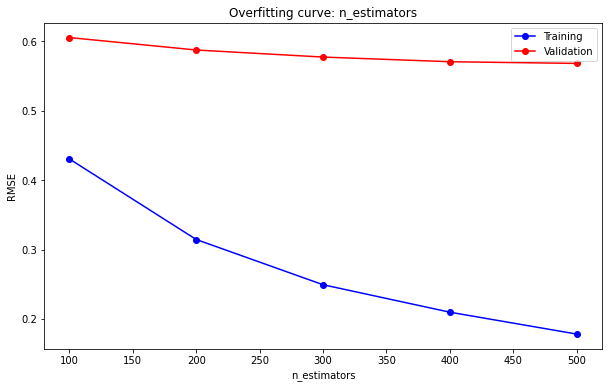

In [95]:
%%time
wbt_df,s21_df=dataset_sample_meter(train2_df_1,1)
df0=s21_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0}
losrf_ne_m1=train_model(XGBRegressor,params,'n_estimators',[100,501,100],t_inputs,v_inputs,t_targets,v_targets)
del s21_df,df0,wbt_df

For 0.05:  0.52480924 0.6510494

For 0.1:  0.40146872 0.62213415

For 0.15000000000000002:  0.32832456 0.59565884

For 0.2:  0.2740167 0.5809474

For 0.25:  0.2388427 0.59038717

CPU times: user 5min 18s, sys: 801 ms, total: 5min 19s

Wall time: 1min 21s


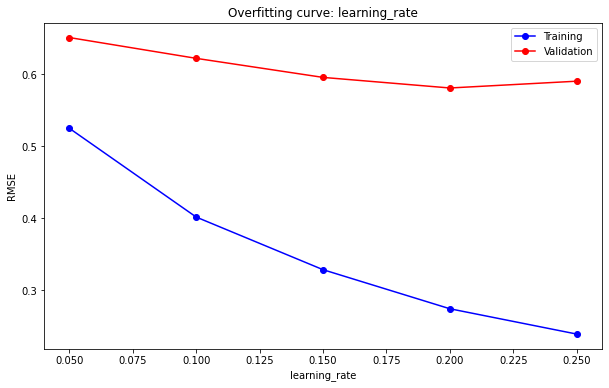

In [96]:
%%time
wbt_df,s21_df=dataset_sample_meter(train2_df_1,1)
df0=s21_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':400,'learning_rate':0}
losrf_lr_m21=train_model(XGBRegressor,params,'learning_rate',[.05,.26,0.05],t_inputs,v_inputs,t_targets,v_targets)
del s21_df,df0,wbt_df

For 6:  0.40146872 0.62213415

For 8:  0.19551624 0.5537524

For 10:  0.075421154 0.52470005

For 12:  0.027822252 0.5257377

CPU times: user 7min 2s, sys: 3.23 s, total: 7min 5s

Wall time: 1min 48s


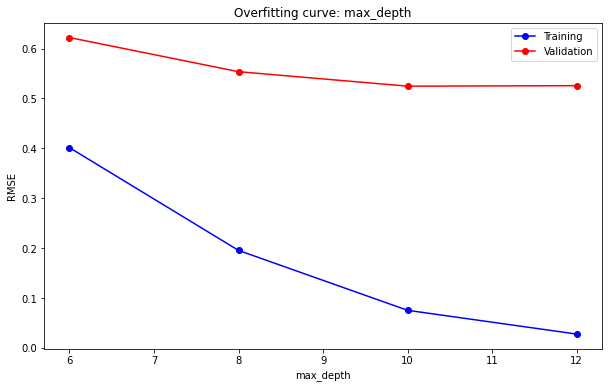

In [97]:
%%time
wbt_df,s21_df=dataset_sample_meter(train2_df_1,1)
df0=s21_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':400,'learning_rate':0.1}
losxg_md_m21=train_model(XGBRegressor,params,'max_depth',[6,13,2],t_inputs,v_inputs,t_targets,v_targets)
del s21_df,df0,wbt_df

In [44]:
params={'n_estimators':400,'learning_rate':0.1,'max_depth':10}

In [45]:
%%time
wbt_df,s21_df=dataset_sample_meter(train2_df_1,1)
df0=s21_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=XGBRegressor(n_jobs=-1,objective='reg:squarederror',random_state=42)
model.fit(t_inputs,t_targets)
del wbt_df,s21_df,df0

CPU times: user 15.3 s, sys: 13.8 ms, total: 15.3 s

Wall time: 3.97 s


In [46]:
%%time
wbt_df=dataset_sample_meter(test2_df_1,.06,test=True)
test2_df_1=test2_df_1[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test21_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test21_preds

test2_df_1=pd.merge(test2_df_1,wbt_df,on='row_id')
del wbt_df
del test21_preds

CPU times: user 595 ms, sys: 10.8 ms, total: 606 ms

Wall time: 312 ms


In [47]:
train3_df_1=train3_df_1.query('meter_reading < 110000')

For 50:  1.1736261 1.3498123

For 70:  1.1222255 1.3467002

For 90:  1.0688779 1.3391635

For 110:  1.013606 1.3328395

For 130:  0.97635746 1.330905

For 150:  0.94168544 1.3343551


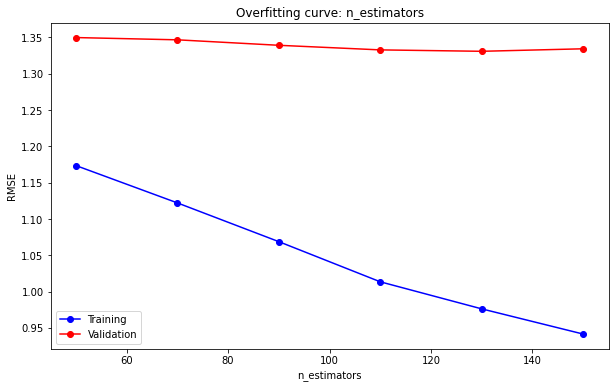

In [203]:
wbt_df,s31_df=dataset_sample_meter(train3_df_1,1)
df0=s31_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0}
losxgb_ne_m1=train_model(XGBRegressor,params,'n_estimators',[50,151,20],t_inputs,v_inputs,t_targets,v_targets)
del s31_df,df0,wbt_df

For 0.05:  1.2990111 1.3763806

For 0.1:  1.2206126 1.3552632

For 0.15000000000000002:  1.154605 1.3458691

For 0.2:  1.0803417 1.3399556

For 0.25:  1.0345123 1.3289192

CPU times: user 1min 31s, sys: 237 ms, total: 1min 31s

Wall time: 23.6 s


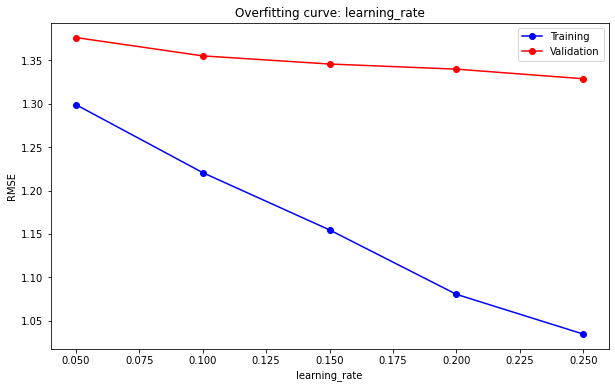

In [81]:
%%time
wbt_df,s31_df=dataset_sample_meter(train3_df_1,1)
df0=s31_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':110}
losxgb_ne_m1=train_model(XGBRegressor,params,'learning_rate',[.05,.26,.05],t_inputs,v_inputs,t_targets,v_targets)
del s31_df,df0,wbt_df

For 6:  1.1830455 1.3511326

For 8:  0.90218985 1.3253673

For 10:  0.6288635 1.3285702


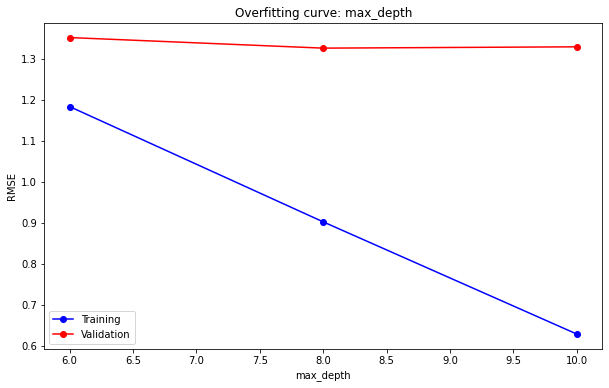

In [84]:
wbt_df,s31_df=dataset_sample_meter(train3_df_1,1)
df0=s31_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':110,'learning_rate':.13}
losxgb_ne_m1=train_model(XGBRegressor,params,'max_depth',[6,11,2],t_inputs,v_inputs,t_targets,v_targets)
del s31_df,df0,wbt_df

In [48]:
%%time
wbt_df,s31_df=dataset_sample_meter(train3_df_1,1)
df0=s31_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=XGBRegressor(n_jobs=-1,n_estimators=110,learning_rate=.13,max_depth=8,random_state=42,objective='reg:squarederror')
model.fit(t_inputs,t_targets)
del wbt_df,s31_df,df0

CPU times: user 23.6 s, sys: 61.5 ms, total: 23.6 s

Wall time: 6.26 s


In [49]:
%%time
wbt_df=dataset_sample_meter(test3_df_1,.06,test=True)
test3_df_1=test3_df_1[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test31_preds=model.predict(test_inputs)
wbt_df['meter_reading']=test31_preds

test3_df_1=pd.merge(test3_df_1,wbt_df,on='row_id')
del wbt_df
del test31_preds

CPU times: user 954 ms, sys: 35 ms, total: 989 ms

Wall time: 451 ms


For 100:  0.5366164 0.7646635

For 200:  0.39955655 0.7383302

For 300:  0.31884128 0.7328095

For 400:  0.25963736 0.72894263

For 500:  0.22117877 0.72793114


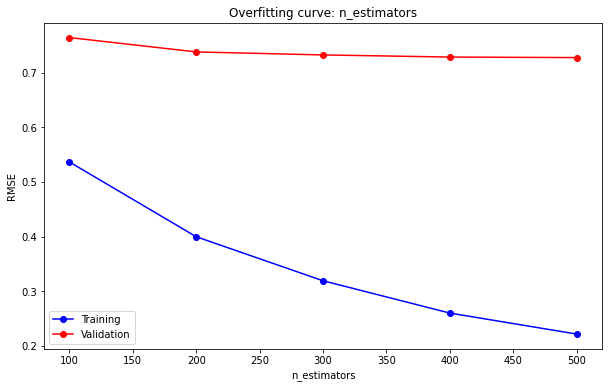

In [207]:
wbt_df,s1_df=dataset_sample_meter(train0_df_1,1)

df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0}
losrf_ne_m1=train_model(XGBRegressor,params,'n_estimators',[100,501,100],t_inputs,v_inputs,t_targets,v_targets)
del s1_df,df0,wbt_df

For 100:  0.5366164 0.7646635

For 200:  0.39955655 0.7383302

For 300:  0.31884128 0.7328095

For 400:  0.25963736 0.72894263

For 500:  0.22117877 0.72793114

CPU times: user 2min 11s, sys: 459 ms, total: 2min 11s

Wall time: 33.8 s


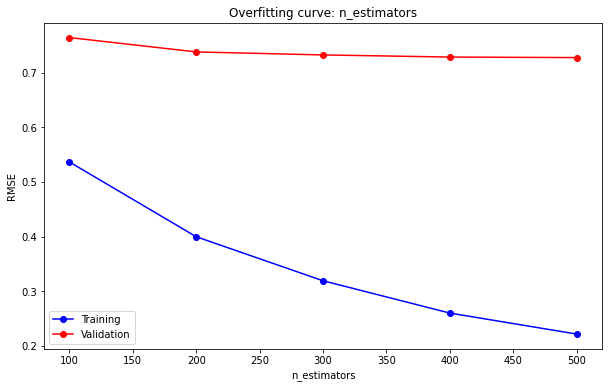

In [41]:
%%time
wbt_df,s1_df=dataset_sample_meter(train0_df_1,1)

df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':0,'objective':'reg:squarederror'}
losrf_ne_m1=train_model(XGBRegressor,params,'n_estimators',[100,501,100],t_inputs,v_inputs,t_targets,v_targets)
del s1_df,df0,wbt_df

For 8:  0.14602649 0.72270143

For 10:  0.052693836 0.71351916

For 12:  0.046700552 0.686174

CPU times: user 3min 52s, sys: 2.34 s, total: 3min 54s

Wall time: 59.9 s


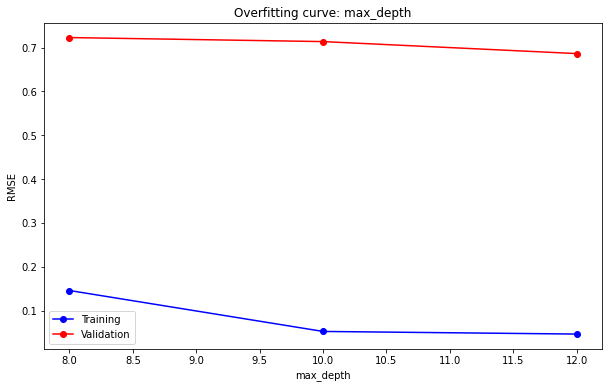

In [43]:
%%time
wbt_df,s1_df=dataset_sample_meter(train0_df_1,1)

df0=s1_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
params={'n_estimators':500,'objective':'reg:squarederror','max_depth':0,'learning_rate':.15}
losrf_ne_m1=train_model(XGBRegressor,params,'max_depth',[8,13,2],t_inputs,v_inputs,t_targets,v_targets)
del s1_df,df0,wbt_df

In [50]:
params={'n_estimators':500,'objective':'reg:squarederror','learning_rate':0.15,'max_depth':12}

In [51]:
%%time
wbt_df,s01_df=dataset_sample_meter(train0_df_1,1)
df0=s01_df.copy()
t_inputs,v_inputs,t_targets,v_targets=preprocess_data(df0,num_cols,cat_cols,target_col)
model=XGBRegressor(n_jobs=-1,random_state=42,**params)
model.fit(t_inputs,t_targets)
del wbt_df,s01_df,df0

CPU times: user 1min 23s, sys: 646 ms, total: 1min 24s

Wall time: 21.5 s


In [52]:
%%time
wbt_df=dataset_sample_meter(test0_df_1,.06,test=True)
test0_df_1=test0_df_1[['row_id']]
test_inputs=preprocess_test_data(wbt_df,num_cols,cat_cols)
wbt_df=wbt_df[['row_id']]
test0_1preds=model.predict(test_inputs)
wbt_df['meter_reading']=test0_1preds

test0_df_1=pd.merge(test0_df_1,wbt_df,on='row_id')
del wbt_df
del test0_1preds

CPU times: user 3.28 s, sys: 4.12 ms, total: 3.28 s

Wall time: 987 ms


In [53]:
# Reason behind creating a separate dataframe for these building ids was - These building ids had same meter reading value throughout the year.
test0_df_2['meter_reading']=0
test0_df_2.loc[test0_df_2.building_id==304,'meter_reading']=.08
test0_df_2.loc[test0_df_2.building_id==740,'meter_reading']=.0004
test0_df_2=test0_df_2[['row_id','meter_reading']]

In [71]:
# Combining all our models together
allparts=[test0_df,test01_df,test02_df,test03_df,test0_df_1,test0_df_2,
         test1_df,test1_df_1,
         test2_df,test2_df_1,
         test3_df,test3_df_1,]
submission_df=pd.concat(allparts)

In [ ]:
# sorting values by row id to have file in same format as submission csv
submission_df.sort_values(by='row_id',inplace=True)
submission_df.reset_index(drop=True)
submission_df.meter_reading=np.expm1(submission_df.meter_reading)

In [73]:
submission_df.row_id.nunique()

41697600

In [78]:
submission_df.to_csv('XgbRegressor_tuned_meter_wise.csv',index=False)

Submission Score:<br>
![](https://i.imgur.com/WrFnhu8.png)

Surely we need to change some strategy. We should select some model in which we can give building_id as categorical column, because there is huge variability in target columns for different building ids. One hot encoding these values lead our systems to go out of memory.<br>

We are getting very high scores on test dataset as compared to validation sets i.e. our data is predicting much higher results. There can be two reasons <br>

1. Either we are removing many of the low lying values as outliers. We removed around 9% of the values that were 0. We should chek 0 meter reading in depth. That can also be the reason of getting lesser score on train and validation sets even without overfitting.
1. We are not removing high lying outliers.
<br><br>
The latter reason does not make much sense as we had already removed high outliers that too after very deeply checking the values. If we would remove more of them may be our model does not generalize well. Let's try removing only and only very high outliers this time.<br>
<br>
The former reason seems to be really very strong as it was not mentioned anywhere that all 0 readings were erratic and will not persist for coming years. We need to check some discussions.<br>
It has been found that all 0 values should not be removed but if they persist for long period for any building then only we should consider removing those values as such error will not occur in coming years (may be they are technical faults which would surely be corrected while gathering test data ).

## LGBM Regression
Light GBM is another kind of gradient boosting model which was specifically designed by Microsoft for Large Datasets. I has high speed, takes lower memory to train and handles categorical values very nicely.It uses two novel techniques: Gradient-based One Side Sampling (GOSS) and Exclusive Feature Bundling (EFB) which fulfills the limitations of histogram-based algorithm that is primarily used in all GBDT (Gradient Boosting Decision Tree) frameworks. The two techniques of GOSS and EFB described below form the characteristics of LightGBM Algorithm. They comprise together to make the model work efficiently and provide it a cutting edge over other GBDT frameworks. To know more about LGBM [here](https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc). 
<br>
<br>
**Based on the latest EDA performed([here](https://www.kaggle.com/code/sahibpreet05/ashrae-additional-eda/notebook)) we will be improving our final training dataframea and making changes in numerical and categorical features to be provided to our model.** This file could not get included into this notebook as it make the size of this notebook very large.

In [3]:
import lightgbm as lgb
from sklearn.model_selection import KFold


Loading required files with suitable dtypes again

In [4]:
%%time
training_dtypes={"building_id":"int16","meter":"int16","meter_reading":"float32"}
train_df=pd.read_csv(f"{data_dir}/train.csv",dtype=training_dtypes)
building_dtypes={'site_id':'int16','building_id':'int16','square_feet':'float32'}
building_df=pd.read_csv(f"{data_dir}/building_metadata.csv",dtype=building_dtypes)
weather_train_df = pd.read_csv(f'{data_dir}/weather_train.csv',dtype={'site_id':'int16'})

CPU times: user 7.51 s, sys: 836 ms, total: 8.34 s

Wall time: 15.6 s


In [5]:
# Defining num_cols, cat_cols and target_col.
num_cols=['square_feet','air_temperature',  'dew_temperature',
          'sea_level_pressure','cloud_coverage','precip_depth_1_hr']
cat_cols=['building_id', 'meter', 
       'is_holiday', 'site_id','primary_use','hour']
target_col=['meter_reading']

**Updating the previously created functions.**

In [6]:
def prepare_main_df(df,weather_df,building_df,train=True):
    df = df.merge(building_df, left_on='building_id',right_on='building_id',how='left')
    if train:
        df=df.query('not (building_id ==1099)')
        df['meter_reading']=np.log1p(df['meter_reading'])
        df = df.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-20")')
        df = df.query('not (building_id == 7 & meter == 1 & timestamp >= "2016-11-3" & timestamp <= "2016-11-28" )')
    df = df.merge(weather_df,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
    df.reset_index(drop=True)
    df['timestamp']=pd.to_datetime(df['timestamp'],format="%Y-%m-%d %H:%M:%S")
    
    df["hour"] = df["timestamp"].dt.hour
    df["weekday"] = df["timestamp"].dt.dayofweek
        
    return df

In [7]:
def prepare_building(b_df):
    b_df.drop(['floor_count','year_built'],axis=1,inplace=True)
    b_df['square_feet'] =  np.log1p(b_df['square_feet'])
    encoder=LabelEncoder()
    # Encoding primary_use with Label Encoder in order to provide it as categorical feature
    b_df['primary_use']=encoder.fit_transform(b_df.primary_use)
    return b_df

In [9]:
def prepare_weather(w_df):
     
    # Finding missing timestamps and adding them to weather data
   
    all_hours=list(w_df.timestamp.unique()) # getting unique timestamps
    for site_id in range(16):
        # getting hours/timestamps for the site
        site_hours = w_df[w_df['site_id'] == site_id]['timestamp']
        # Finding missing timestamps using setdiff1d
        missing_hours_df= pd.DataFrame(np.setdiff1d(all_hours,site_hours),columns=['timestamp'])
        missing_hours_df['site_id'] = site_id
        # concating missing timestaamps with weather data
        w_df = pd.concat([w_df,missing_hours_df])
    w_df = w_df.reset_index(drop=True)  
    # deleting unrequired features to reduce memory
    del site_hours,missing_hours_df 
    
    # converting timestamp to datetime and adding features so that we can impute missing values
    w_df['timestamp1']=pd.to_datetime(w_df.timestamp)
    w_df['hour']=w_df.timestamp1.dt.hour
    w_df['day']=w_df.timestamp1.dt.day
    w_df['month']=w_df.timestamp1.dt.month
    w_df.drop('timestamp1',axis=1,inplace=True)
    # changing index so that grouping operation can be don efficiently
    w_df.set_index(['site_id','month','day'],inplace=True)
    # Listing all weather features we want to give to our training data
    w_features=['cloud_coverage','air_temperature','dew_temperature','sea_level_pressure','precip_depth_1_hr']
    # Filling missing values based on mean for that day               
    for i in (w_features):
        filler = w_df.groupby(['site_id','month','day'])[f'{i}'].mean()
        filler = pd.DataFrame(filler.fillna(method='ffill'),columns=[f"{i}"])
        w_df.update(filler,overwrite=False)
    w_df.reset_index(inplace=True)#resetting index 
    w_features+=['site_id','timestamp'] 
    w_df=w_df[w_features]    # keeping only useful features      
     
    return w_df

Using above defined functions to prepare our datasets

In [10]:
%%time
weather_train_df=prepare_weather(weather_train_df)

CPU times: user 2min 6s, sys: 31.8 s, total: 2min 37s

Wall time: 2min 36s


In [11]:
%%time
buildings_df=prepare_building(building_df)

CPU times: user 3.83 ms, sys: 0 ns, total: 3.83 ms

Wall time: 3.1 ms


In [12]:
%%time
train_df=prepare_main_df(train_df,weather_train_df, building_df)

CPU times: user 21 s, sys: 4.25 s, total: 25.2 s

Wall time: 24.9 s


In [13]:
# removing all features which don't seem to be much important
useful_features=['building_id', 'meter','meter_reading', 'site_id',
       'primary_use', 'square_feet', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr','sea_level_pressure',
        'hour', 'weekday']
train_df=train_df[useful_features]

Because of shortage of time , It was decided to just train a single model on whole data. For this we needed to find someway to reduce the memory usage by the datasets. Just to avoid going out of RAM.
<br>
Fortunately there was a piece of code that was used by one of the Kaggle members which could effectly reduce the size of our datasets. 

In [ ]:
# Original code from https://www.kaggle.com/gemartin/load-data-reduce-memory-usage by @gemartin

from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.        
    """
    
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [14]:
train_df=reduce_mem_usage(train_df, use_float16=False)

Memory usage of dataframe is 1628.22 MB

Memory usage after optimization is: 814.11 MB

Decreased by 50.0%


This is amazing. The memory usage got reduced by 50%. Now we can move ahead with confidence.

In [15]:
# deleting files that are no longer required
del weather_train_df
gc.collect()

155

In [16]:
target = train_df["meter_reading"]
inputs = train_df.drop('meter_reading', axis = 1)
del train_df
gc.collect()

23

In [17]:
#1. Defining categorical columns, parameter for our model and kfold (3 fold) setup
#2. Training the models for each fold and deleting variables that are no longer required just to check memory use
cat_cols = ["building_id", "site_id", "meter", "primary_use", "weekday"]
params = {"learning_rate": 0.05,"num_leaves": 1300,"feature_fraction": 0.85,"subsample":0.9,
          "reg_lambda": 2,"metric": "rmse"}

kf = KFold(n_splits=3)
models = []
for train_index,val_index in kf.split(inputs):
    train_inputs = inputs.loc[train_index]
    train_target = target.loc[train_index]
    
    val_inputs = inputs.loc[val_index]
    val_target = target.loc[val_index]
    
    train_d = lgb.Dataset(train_inputs, label=train_target,categorical_feature=cat_cols, free_raw_data=False)
    val_d = lgb.Dataset(val_inputs, label=val_target,categorical_feature=cat_cols, free_raw_data=False)
    
    model = lgb.train(params, train_set=train_d, num_boost_round=1000, valid_sets=[train_d,val_d], verbose_eval=25, early_stopping_rounds=50)
    models.append(model)
    del train_inputs, train_target, val_inputs, val_target, train_d, val_d
    gc.collect()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.167121 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 2828

[LightGBM] [Info] Number of data points in the train set: 13234948, number of used features: 12

[LightGBM] [Info] Start training from score 4.243921

Training until validation scores don't improve for 50 rounds

[25]	training's rmse: 1.10637	valid_1's rmse: 1.25939

[50]	training's rmse: 0.884676	valid_1's rmse: 1.12997

[75]	training's rmse: 0.808088	valid_1's rmse: 1.11281

[100]	training's rmse: 0.764579	valid_1's rmse: 1.11283

[125]	training's rmse: 0.734872	valid_1's rmse: 1.11488

Early stopping, best iteration is:

[86]	training's rmse: 0.786717	valid_1's rmse: 1.11197

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.187298 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 2811

[LightGBM]

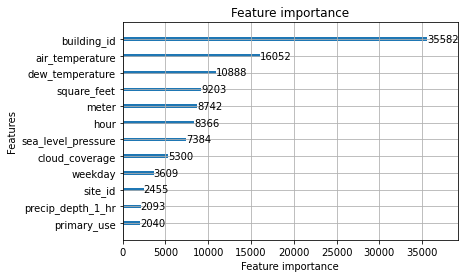

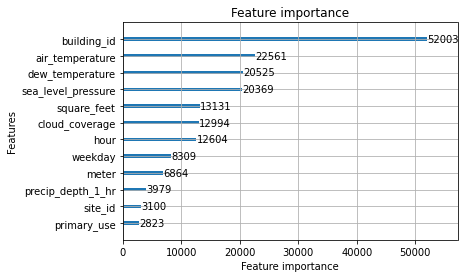

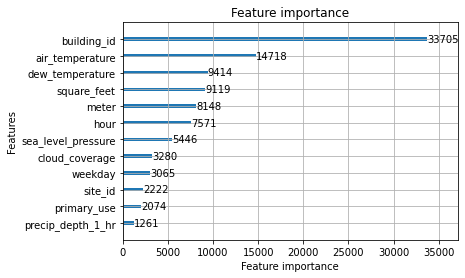

In [18]:
# Let's plot feature importances
for model in models:
    lgb.plot_importance(model)
    plt.show()

> **Here we can realize the power of LGBM**<br>
We could not provide building id as a categorical column to XGBoost or RandomForest because One Hot Encoding 1500 building ids would drastically increase the size of our DataFrames.<br>
The execution was really very fast. We could not have trained XGBoost within this amout of time over a 10% sample of our full data.
<br>
But Let's apply our model on Test set and make a submission so that our model could be evaluated

In [19]:
# Loading test csv
test_df = pd.read_csv('/kaggle/input/ashrae-energy-prediction/test.csv')
# dropping row_id column
test_df.drop("row_id", axis=1, inplace=True)
# apply memory reduction function
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 954.38 MB

Memory usage after optimization is: 199.47 MB

Decreased by 79.1%


In [20]:
# Reading weather test file , preparing it and reducing memory
weather_test_df = pd.read_csv('/kaggle/input/ashrae-energy-prediction/weather_test.csv')
weather_test_df = prepare_weather(weather_test_df)
weather_test_df = reduce_mem_usage(weather_test_df)

Memory usage of dataframe is 14.97 MB

Memory usage after optimization is: 6.79 MB

Decreased by 54.7%


In [ ]:
# preparing the final df and deleting dfs which are no longer required
test_df=prepare_main_df(test_df, weather_test_df, building_df,train=False)
del weather_test_df,building_df

In [23]:
# keeping only useful features
useful_features.remove('meter_reading')
test_df=test_df[useful_features]

In [26]:
# Finally applying model to make predictions
preds = []
for model in models:
    # For first iteration
    if  preds == []:
        # converting back to original meter reading using np.expm1
        preds = np.expm1(model.predict(test_df, num_iteration=model.best_iteration))/3
        # converting it to array so that we can add results from other iterations efficiently
        preds=np.array(preds)
    # For 2nd and 3rd iterations
    else:
        preds += np.expm1(model.predict(test_df, num_iteration=model.best_iteration))/3
    # deleting model each time to reduce memory as they have served their purpose    
    del model
    gc.collect()

In [27]:
# Reading submission file and adding the predicted meter_readings
submission_df=pd.read_csv("/kaggle/input/ashrae-energy-prediction/sample_submission.csv")
submission_df['meter_reading'] = preds

In [29]:
# Look at a top few rows
submission_df.head(10)

row_id  meter_reading
0       0     115.173831
1       1      93.023863
2       2       8.976266
3       3     245.665796
4       4    1004.739553
5       5      29.788555
6       6     102.215839
7       7     426.535805
8       8     354.303730
9       9     339.355586

In [28]:
%%time
submission_df.to_csv("LGBM Submissionn.csv",index=False)

CPU times: user 1min 36s, sys: 2.97 s, total: 1min 39s

Wall time: 1min 39s


Submission Score:- <br>
![](https://i.imgur.com/0bDI0i8.png)

This is pretty good improvement in score.

# Summary
Best results were obtained using **Light GBM which lands us in top 38% of Leaderboard** of this Kaggle competition.
<br>
Three different Regression models were used
- Random Forest Regressor
- XGBoost Regressor
- Light GBM Regressor
<br>After training each model different techniques were used to modify and improve Training Data to get best results on Test Data and attempts remained successful each time.
<br>
- It was observed that with lower learning rates and increasing other hyperparameters of the model resulted in improvement of results.
- LGBM proved out to be Most effective in terms of time cost.
- It was huge dataset we had regularly remove variables occupying huge size

# Future Work
- More EDA can be performed to spot and remove erratic target values for different buildings
- More Feature Engineering can be done. Values in weather data are highly fluctuating, treating those columns may help in model improvement. [See here](https://towardsdatascience.com/splines-for-feature-selection-and-data-smoothing-python-ed5ad31436d5)
- More Hyperparameter Tuning in deeper levels can be implemented to Final model. (Gridsearch CV can be used to tune more than parameters at Once )
- After final modifications, training different Models for different meters and different sites may lead to significant improvement in score.
- Other GBM's such as Catboost,Adaboost etc. can also be tried for more accuracy.


# References
-  https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/workshop-machine-learning-project-from-scratch
- https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a
- http://seaborn.pydata.org/
- https://plotly.com/python/
- https://www.geeksforgeeks.org/
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor
- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/decision-trees-and-random-forests
- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/gradient-boosting-machines-with-xgboost
- https://xgboost.readthedocs.io/en/stable/
- https://machinelearningmastery.com/xgboost-for-regression/
- https://lightgbm.readthedocs.io/en/v3.3.2/
- https://towardsdatascience.com/hyperparameter-tuning-to-reduce-overfitting-lightgbm-5eb81a0b464e
- https://neptune.ai/blog/lightgbm-parameters-guide
- https://www.kaggle.com/competitions/ashrae-energy-prediction/discussion
- https://towardsdatascience.com/splines-for-feature-selection-and-data-smoothing-python-ed5ad31436d5
- https://towardsdatascience.com/random-forests-an-ensemble-of-decision-trees-37a003084c6c
- https://towardsdatascience.com/what-makes-lightgbm-lightning-fast-a27cf0d9785e